In [1]:
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show/Hide code</button>''', raw=True)

Show/Hide code

In [2]:
#Allow the created content to be interactivelly ploted inline
%matplotlib inline
#Establish width and height for all plots in the report
#pylab.rcParams['figure.figsize'] = (18, 6) #width, height

In [3]:
#Import needed libraries
import os
from os.path import join, getsize
import pandas as pd
from cycler import cycler
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
#the next cell enables plotting tables without borders

In [4]:
%%html
<style>
table,td,tr,th {border:none!important}
</style>

![](http://i.imgur.com/gxsvSDM.png)

# Summary report of the CO2MPAS WLTP to NEDC CO$_2$ emission simulation model

[Visit the CO2MPAS home page](http://co2mpas.io)

Complete path to the CO2MPAS summary file used in this report:

In [5]:
#Specify the output folder and file containing the CO2MPAS summary output file.
folder = r'D:\co2mpas-version-trials\20160329\co2mpas.base.venv.venv\out_ATs'
file = '20160330_173232-summaryAN.xlsx'
infile = join(folder, file)
df=pd.read_excel(infile, 'summary', header=[0, 1, 2], index_col=[0], skiprows=[3])
print(infile)

D:\co2mpas-version-trials\20160329\co2mpas.base.venv.venv\out_ATs\20160330_173232-summaryAN.xlsx


In [6]:
#Gather and name the basic variables used in the report according to their name in the CO2MPAS output file
NEDC = df['nedc']['prediction']['co2_emission_value']
NEDCt = df['nedc']['target']['co2_emission_value']
dNEDC = NEDC-NEDCt
UDC = df['nedc']['prediction']['co2_emission_UDC']
UDCt = df['nedc']['target']['co2_emission_UDC']
dUDC = UDC - UDCt
EUDC = df['nedc']['prediction']['co2_emission_EUDC']
EUDCt = df['nedc']['target']['co2_emission_EUDC']
dEUDC = EUDC - EUDCt
#Obtain the case number and vehicle model from the input file
df['vehicle'] = df.index
cases = df['vehicle'].str.split('_').str[-1].astype('int')
model = df['vehicle'].str.split('_').str[0]
#Create a dataframe with this data
valuesDF = pd.DataFrame({'NEDC': NEDC,'NEDCt':NEDCt, 'dNEDC':dNEDC,'UDC': UDC,'UDCt':UDCt, 'dUDC':dUDC,'EUDC': EUDC,'EUDCt':EUDCt, 'dEUDC':dEUDC,'Case':cases,'Model':model})   
if (valuesDF.NEDC.count()-valuesDF.NEDCt.count()) != 0:
    print('NOTE:',valuesDF.NEDC.count(),'NEDC 'u'CO\u2082 values provided and',valuesDF.NEDCt.count(),'target NEDC 'u'CO\u2082 values provided')
    print('      Reporting will continue only with cases containing all the needed input')
valuesDF = valuesDF.dropna()

## Section 1. Performance of the model. All vehicles and test cases.

### Error statistics for CO$_2$ emission per driving cycle

Error statistics for **NEDC**, **UDC**, and **EUDC** CO$_2$ emission

In [7]:
#Create a dataframe with the NECD, UDC, EUDC error statistics
errorsDF = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['NEDC [gCO$_2$ km$^{-1}$]','UDC [gCO$_2$ km$^{-1}$]', 'EUDC [gCO$_2$ km$^{-1}$]'])
errorsDF.loc['Averages'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.mean(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.mean(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.mean(),2)})
errorsDF.loc['StdError'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.sem(),2)})
errorsDF.loc['Median'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.median(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.median(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.median(),2)})
errorsDF.loc['Mode'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.mode().iloc[0],2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.mode().iloc[0],2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.mode().iloc[0],2)})
errorsDF.loc['StdDev'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.std(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.std(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.std(),2)})
errorsDF.loc['Variance'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.var(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.var(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.var(),2)})
errorsDF.loc['Kurtosis'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.kurtosis(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.kurtosis(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.kurtosis(),2)})
errorsDF.loc['Skweness'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.skew(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.skew(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.skew(),2)})
errorsDF.loc['Range'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dNEDC.max()-valuesDF.dNEDC.min()),2), 'UDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dUDC.max()-valuesDF.dUDC.min()),2), 'EUDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dEUDC.max()-valuesDF.dEUDC.min()),2)})
errorsDF.loc['Minimum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.min(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.min(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.min(),2)})
errorsDF.loc['Maximum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.max(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.max(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.max(),2)})
errorsDF.loc['Sum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.sum(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.sum(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.sum(),2)})
errorsDF.loc['Count'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.count(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.count(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.count(),2)})
errorsDF.loc['Confidence level (95%)'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dEUDC.sem(),2)})
errorsDF

,NEDC [gCO$_2$ km$^{-1}$],UDC [gCO$_2$ km$^{-1}$],EUDC [gCO$_2$ km$^{-1}$]
Averages,-2.09,-3.29,-1.39
StdError,0.15,0.29,0.09
Median,-3.02,-5.03,-1.5
Mode,-3.39,-4.82,-2.91
StdDev,2.88,5.38,1.64
Variance,8.31,28.99,2.68
Kurtosis,1,1.82,-0.84
Skweness,1.26,1.52,0.48
Range,13.8,27.64,6.26
Minimum,-7.15,-13.08,-3.95


Error statistics for CO$_2$ emission per driving cycle applying a filtering of NEDC absolute error < 25 gCO$_2$ km$^{-1}$

Removed cases and associated error of CO$_2$ emission for NEDC

In [8]:
#list of filtered cases
fcases = valuesDF[abs(valuesDF.dNEDC) > 25]
fcases2 = pd.DataFrame({'Absolute error gCO$_2$ km$^{-1}$':fcases.dNEDC})
print((len(fcases.dNEDC)),'cases with an absolute NEDC 'u'CO\u2082 emission error above 25 g'u'CO\u2082/km')
fcases2.columns.name='# case'
if (len(fcases.dNEDC)) != 0:
    fcases

0 cases with an absolute NEDC CO₂ emission error above 25 gCO₂/km


Error statistics for **NEDC**, **UDC**, and **EUDC** CO$_2$ emission (filtered)

In [9]:
#Create a dataframe with the FILETERED NECD, UDC, EUDC error statistics
#removing the cases where the absolute error for NEDC is larger than 25gCO2/km
fvaluesDF = valuesDF[abs(valuesDF.dNEDC) < 25]
ferrorsDF = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['NEDC [gCO$_2$ km$^{-1}$]','UDC [gCO$_2$ km$^{-1}$]', 'EUDC [gCO$_2$ km$^{-1}$]'])
ferrorsDF.loc['Averages'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.mean(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.mean(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.mean(),2)})
ferrorsDF.loc['StdError'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.sem(),2)})
ferrorsDF.loc['Median'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.median(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.median(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.median(),2)})
ferrorsDF.loc['Mode'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.mode().iloc[0],2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.mode().iloc[0],2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.mode().iloc[0],2)})
ferrorsDF.loc['StdDev'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.std(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.std(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.std(),2)})
ferrorsDF.loc['Variance'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.var(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.var(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.var(),2)})
ferrorsDF.loc['Kurtosis'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.kurtosis(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.kurtosis(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.kurtosis(),2)})
ferrorsDF.loc['Skweness'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.skew(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.skew(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.skew(),2)})
ferrorsDF.loc['Range'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round((fvaluesDF.dNEDC.max()-fvaluesDF.dNEDC.min()),2), 'UDC [gCO$_2$ km$^{-1}$]':round((fvaluesDF.dUDC.max()-fvaluesDF.dUDC.min()),2), 'EUDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dEUDC.max()-valuesDF.dEUDC.min()),2)})
ferrorsDF.loc['Minimum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.min(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.min(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.min(),2)})
ferrorsDF.loc['Maximum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.max(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.max(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.max(),2)})
ferrorsDF.loc['Sum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.sum(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.sum(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.sum(),2)})
ferrorsDF.loc['Count'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.count(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.count(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.count(),2)})
ferrorsDF.loc['Confidence level (95%)'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':2*round(fvaluesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':2*round(fvaluesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':2*round(fvaluesDF.dEUDC.sem(),2)})
if (len(valuesDF.dNEDC)-len(fvaluesDF.dNEDC)) == 0:
    print('No filtering needed, same statistics as above')
else:
    display(ferrorsDF)

No filtering needed, same statistics as above


Distribution of the **NEDC**, **UDC** and **EUDC** errors for filtered cases

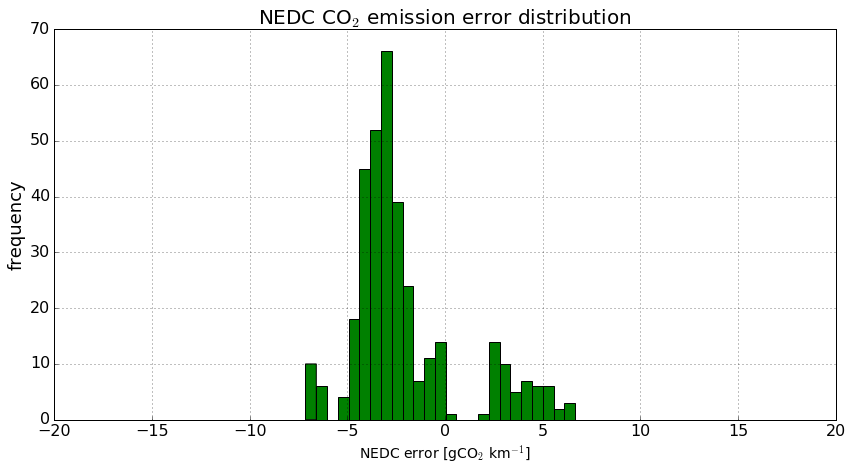

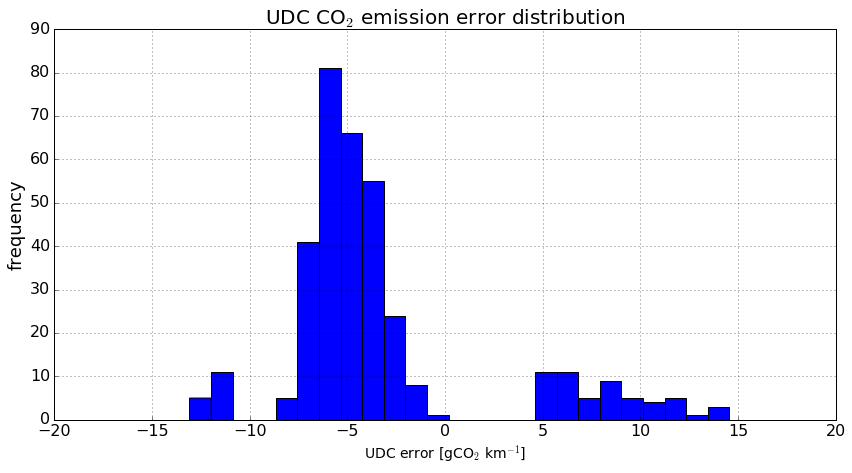

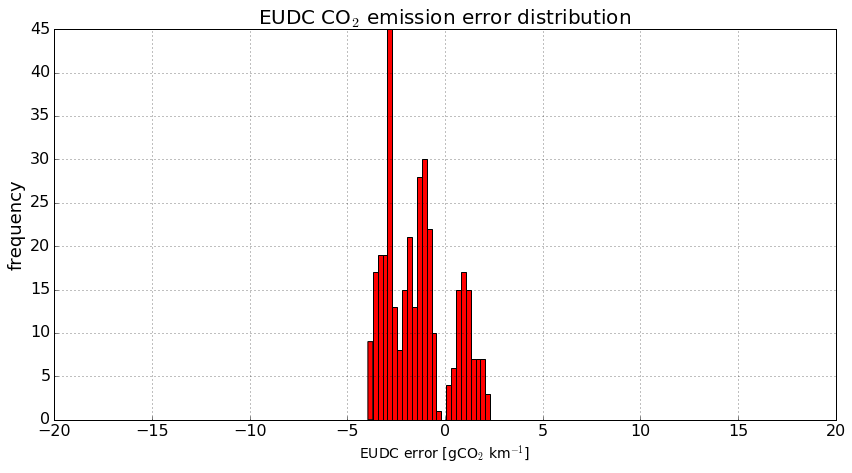

In [10]:
#NEDC
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
NEDC_hist = fvaluesDF.dNEDC.hist(bins=25, color='green')
NEDC_hist.set_xlabel("NEDC error [gCO$_2$ km$^{-1}$]",fontsize=14)
NEDC_hist.set_ylabel("frequency",fontsize=14)
# NEDC_hist.set_ylim(0,140)
plt.title('NEDC CO$_2$ emission error distribution', fontsize=20)
plt.ylabel("frequency",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(-20, 20)
plt.show()
#UDC
fig = plt.figure(1, figsize=(14, 7))
ax = fig.add_subplot(111)
UDC_hist = fvaluesDF.dUDC.hist(bins=25, color='blue') 
UDC_hist.set_xlabel("UDC error [gCO$_2$ km$^{-1}$]",fontsize=14)
UDC_hist.set_ylabel("frequency",fontsize=14)
plt.title('UDC CO$_2$ emission error distribution', fontsize=20)
plt.ylabel("frequency",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(-20, 20)
plt.show()
#EUDC
fig = plt.figure(1, figsize=(14, 7))
ax = fig.add_subplot(111)
EUDC_hist = fvaluesDF.dEUDC.hist(bins=25, color='red') 
EUDC_hist.set_xlabel("EUDC error [gCO$_2$ km$^{-1}$]",fontsize=14)
EUDC_hist.set_ylabel("frequency",fontsize=14)
plt.title('EUDC CO$_2$ emission error distribution', fontsize=20)
plt.ylabel("frequency",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(-20, 20)
plt.show()

Comparative emission error per driving cycle (gCO$_2$ km$^{-1}$)

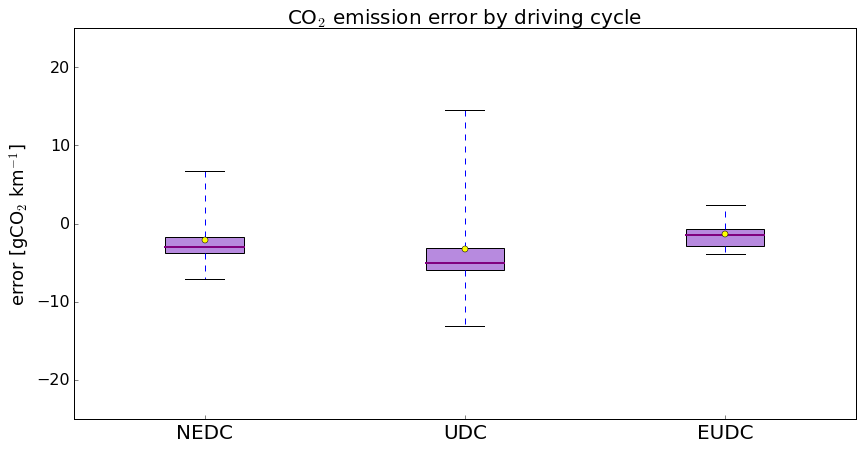

The purple box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [11]:
#Alternatively show boxplots
toboxplot = [fvaluesDF.dNEDC,fvaluesDF.dUDC,fvaluesDF.dEUDC]
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(toboxplot, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = '#b78adf' )
    ## Custom x-axis labels
ax.set_xticklabels(['NEDC', 'UDC', 'EUDC'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('CO$_2$ emission error by driving cycle', fontsize=20)
plt.ylabel("error [gCO$_2$ km$^{-1}$]",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.set_ylim(-25, 25)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The purple box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

### Error statistics per technology type (filtered for absolute errors above 25g CO$_2$ km$^{-1}$)

In [12]:
#Create a dataframe with the NECD, UDC, EUDC and vehicle model and case
CarMod = pd.DataFrame({'dNEDC':fvaluesDF.dNEDC,'dUDC':fvaluesDF.dUDC,'dEUDC':fvaluesDF.dEUDC,'Model code':fvaluesDF.Model,'Case':fvaluesDF.Case})         
#filter for absolute errors above 25g CO2 per km
mod_cases = CarMod[abs(CarMod.dNEDC) < 25]

In [13]:
#Print a dictionary with the tested technologies and their identification codes
tec = pd.DataFrame(index=['Base case','Gear configuration A','Gear configuration B','No Start/Stop','No Break energy recuperation','Variable valve lifting','Direct injection/Multipoint injection','Thermal management'])
tec['Technology code'] = ['BC','GCA','GCB','NOSS','NOBERS','VVL','DI/MPI','ThM']
tec.columns.name='Technology type'
tec

Technology type,Technology code
Base case,BC
Gear configuration A,GCA
Gear configuration B,GCB
No Start/Stop,NOSS
No Break energy recuperation,NOBERS
Variable valve lifting,VVL
Direct injection/Multipoint injection,DI/MPI
Thermal management,ThM


In [14]:
#Function that assigns the number of case to the specific technology tested for each vehicle model
def assign_technol_perCarAndCase(df):
    #looks for the case # in the input file and assigns a technology
    df_basecase = df[mod_cases['Case'] <= 27]
    df_gb1 = df[(mod_cases['Case'] > 27) & (mod_cases['Case'] <= 54)]
    df_gb2 = df[(mod_cases['Case'] > 54) & (mod_cases['Case'] <= 81)]
    df_ss = df[(mod_cases['Case'] > 81) & (mod_cases['Case'] <= 108)]
    df_bers = df[(mod_cases['Case'] > 108) & (mod_cases['Case'] <= 135)]
    #some vehicles have more possible technologies than others (long vs short) and an additional technology assignment is performed for the former group
    In_long = (mod_cases['Model code'] == 'Vehicle1')
    In_short = (mod_cases['Model code'] == 'Vehicle2')
    I_vvl = (mod_cases['Case'] >= 136) & (mod_cases['Case'] <= 162)
    df_vvl = df[In_long & I_vvl]
    I_dimpi = (mod_cases['Case'] >= 163) & (mod_cases['Case'] <= 189)
    df_dimpi = df[In_long & I_dimpi]
    I_short_tm = (mod_cases['Case'] >= 136)
    I_long_tm = (mod_cases['Case'] >= 190)
    I_tm = (In_short & I_short_tm) | (In_long & I_long_tm)
    df_tm = df[I_tm]
    #Append to the original DF a column with the technology IDcode
    pd.options.mode.chained_assignment = None  # default='warn'
    df_basecase.loc[:,'Tecno'] = 'BC'
    df_gb1.loc[:,'Tecno'] = 'GCA'
    df_gb2.loc[:,'Tecno'] = 'GCB'
    df_ss.loc[:,'Tecno'] = 'NOSS'
    df_bers.loc[:,'Tecno'] = 'NOBERS'
    try:
        df_vvl.loc[:,'Tecno'] = 'VVL'
    except:
        pass
    try:
        df_dimpi.loc[:,'Tecno'] = 'DI/MPI'
    except:
        pass
    try:
        df_tm.loc[:,'Tecno'] = 'ThM'
    except:
        pass
    bigdata = pd.concat([df_basecase,df_gb1,df_gb2,df_ss,df_bers,df_vvl,df_dimpi,df_tm], ignore_index=False)
    return bigdata

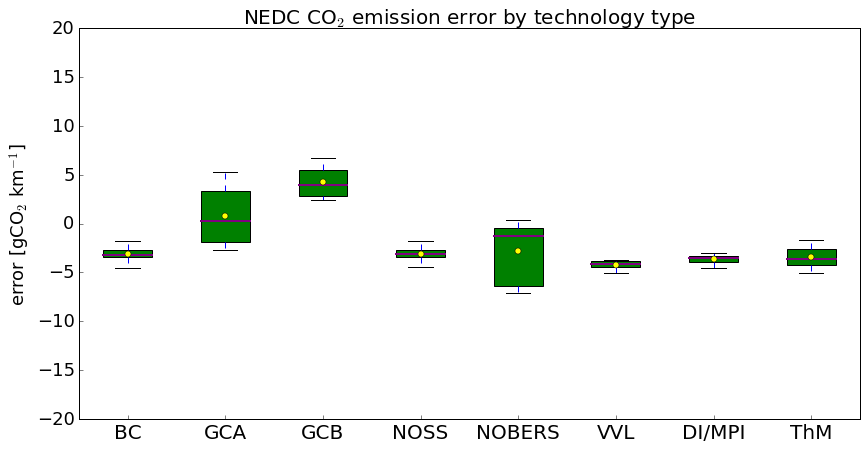

The green box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [15]:
#Plot the NEDC errors per technology type in a boxplot
tech = assign_technol_perCarAndCase(mod_cases)
techBC = tech[tech['Tecno'] == 'BC']
techGCA = tech[tech['Tecno'] == 'GCA']
techGCB = tech[tech['Tecno'] == 'GCB']
techNOSS = tech[tech['Tecno'] == 'NOSS']
techBERS = tech[tech['Tecno'] == 'NOBERS']
techVVL = tech[tech['Tecno'] == 'VVL']
techDIMPI = tech[tech['Tecno'] == 'DI/MPI']
techThM = tech[tech['Tecno'] == 'ThM']
techboxplot = [techBC.dNEDC,techGCA.dNEDC,techGCB.dNEDC,techNOSS.dNEDC,techBERS.dNEDC,techVVL.dNEDC,techDIMPI.dNEDC,techThM.dNEDC]
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(techboxplot, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = 'green' )
    ## Custom x-axis labels
ax.set_xticklabels(['BC', 'GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','ThM'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('NEDC CO$_2$ emission error by technology type', fontsize=20)
plt.ylabel("error [gCO$_2$ km$^{-1}$]",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylim(-20, 20)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The green box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

Descriptive statistics for **NEDC** CO$_2$ emission error per technology type

In [16]:
grouped = tech.groupby('Tecno')
gNEDCmean = grouped.dNEDC.mean()
gNEDCsem = grouped.dNEDC.sem()
gNEDCmedian = grouped.dNEDC.median()
gNEDCstd = grouped.dNEDC.std()
gNEDCvar = grouped.dNEDC.var()
gNEDCskew = grouped.dNEDC.skew()
gNEDCrange = grouped.dNEDC.max()-grouped.dNEDC.min()
gNEDCmin = grouped.dNEDC.min()
gNEDCmax = grouped.dNEDC.max()
gNEDCsum = grouped.dNEDC.sum()
gNEDCcount = grouped.dNEDC.count()
gNEDC_CI95 = 2*grouped.dNEDC.sem()
NEDCerrorsTec = pd.DataFrame(index=['Averages','StdError','Median','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['BC','GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','ThM'])
NEDCerrorsTec.loc['Averages'] = pd.Series.round(gNEDCmean,2)
NEDCerrorsTec.loc['StdError'] = pd.Series.round(gNEDCsem,2)
NEDCerrorsTec.loc['Median'] = pd.Series.round(gNEDCmedian,2)
NEDCerrorsTec.loc['StdDev'] = pd.Series.round(gNEDCstd,2)
NEDCerrorsTec.loc['Variance'] = pd.Series.round(gNEDCvar,2)
NEDCerrorsTec.loc['Kurtosis'] = [round(techBC.dNEDC.kurtosis(),2),round(techGCA.dNEDC.kurtosis(),2),round(techGCB.dNEDC.kurtosis(),2),round(techNOSS.dNEDC.kurtosis(),2),round(techBERS.dNEDC.kurtosis(),2),round(techVVL.dNEDC.kurtosis(),2),round(techDIMPI.dNEDC.kurtosis(),2),round(techThM.dNEDC.kurtosis(),2)]
NEDCerrorsTec.loc['Skweness'] = pd.Series.round(gNEDCskew,2)
NEDCerrorsTec.loc['Range'] = pd.Series.round(gNEDCrange,2)
NEDCerrorsTec.loc['Minimum'] = pd.Series.round(gNEDCmin,2)
NEDCerrorsTec.loc['Maximum'] = pd.Series.round(gNEDCmax,2)
NEDCerrorsTec.loc['Sum'] = pd.Series.round(gNEDCsum)
NEDCerrorsTec.loc['Count'] = pd.Series.round(gNEDCcount)
NEDCerrorsTec.loc['Confidence level (95%)'] = pd.Series.round(gNEDC_CI95,2)
NEDCerrorsTec.columns.name='NEDC error'
NEDCerrorsTec

NEDC error,BC,GCA,GCB,NOSS,NOBERS,VVL,DI/MPI,ThM
Averages,-3.15,0.74,4.24,-3.1,-2.82,-4.2,-3.66,-3.46
StdError,0.08,0.39,0.27,0.07,0.38,0.07,0.08,0.13
Median,-3.23,0.3,3.97,-3.16,-1.29,-4.1,-3.54,-3.63
StdDev,0.6,2.85,1.39,0.49,2.75,0.37,0.41,0.94
Variance,0.36,8.14,1.93,0.24,7.57,0.14,0.16,0.89
Kurtosis,-0.16,-1.78,-1.33,1.18,-1.48,0.03,-0.67,-1.33
Skweness,0.07,0.13,0.27,0.19,-0.51,-0.76,-0.43,0.14
Range,2.79,7.95,4.2,2.67,7.49,1.35,1.47,3.35
Minimum,-4.58,-2.71,2.46,-4.48,-7.15,-5.05,-4.51,-5.03
Maximum,-1.79,5.24,6.66,-1.81,0.35,-3.7,-3.03,-1.69


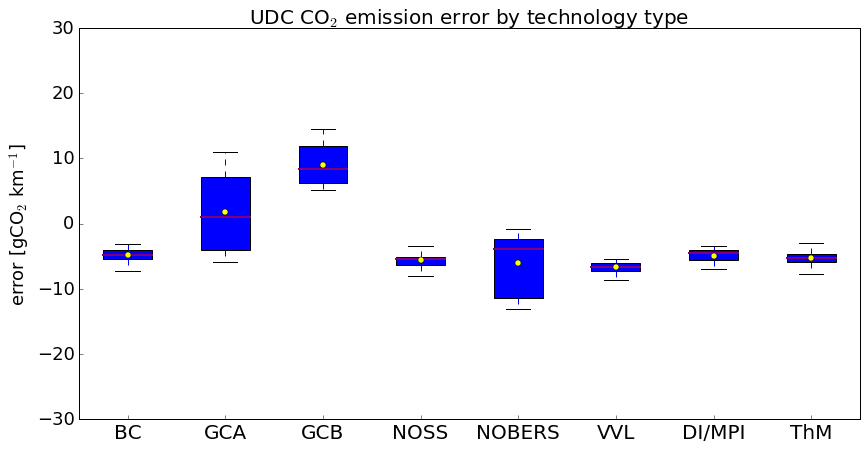

The blue box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [17]:
#Plot the UDC errors per technology type in a boxplot
techboxplot = [techBC.dUDC,techGCA.dUDC,techGCB.dUDC,techNOSS.dUDC,techBERS.dUDC,techVVL.dUDC,techDIMPI.dUDC,techThM.dUDC]
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(techboxplot, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = 'blue' )
## Custom x-axis labels
ax.set_xticklabels(['BC', 'GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','ThM'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('UDC CO$_2$ emission error by technology type', fontsize=20)
plt.ylabel("error [gCO$_2$ km$^{-1}$]",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylim(-30, 30)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The blue box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

Descriptive statistics for **UDC** CO$_2$ emission error per technology type

In [18]:
gUDCmean = grouped.dUDC.mean()
gUDCsem = grouped.dUDC.sem()
gUDCmedian = grouped.dUDC.median()
gUDCstd = grouped.dUDC.std()
gUDCvar = grouped.dUDC.var()
gUDCskew = grouped.dUDC.skew()
gUDCrange = grouped.dUDC.max()-grouped.dUDC.min()
gUDCmin = grouped.dUDC.min()
gUDCmax = grouped.dUDC.max()
gUDCsum = grouped.dUDC.sum()
gUDCcount = grouped.dUDC.count()
gUDC_CI95 = 2*grouped.dUDC.sem()
UDCerrorsTec = pd.DataFrame(index=['Averages','StdError','Median','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['BC','GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','ThM'])
UDCerrorsTec.loc['Averages'] = pd.Series.round(gUDCmean,2)
UDCerrorsTec.loc['StdError'] = pd.Series.round(gUDCsem,2)
UDCerrorsTec.loc['Median'] = pd.Series.round(gUDCmedian,2)
UDCerrorsTec.loc['StdDev'] = pd.Series.round(gUDCstd,2)
UDCerrorsTec.loc['Variance'] = pd.Series.round(gUDCvar,2)
UDCerrorsTec.loc['Kurtosis'] = [round(techBC.dUDC.kurtosis(),2),round(techGCA.dUDC.kurtosis(),2),round(techGCB.dUDC.kurtosis(),2),round(techNOSS.dUDC.kurtosis(),2),round(techBERS.dUDC.kurtosis(),2),round(techVVL.dUDC.kurtosis(),2),round(techDIMPI.dUDC.kurtosis(),2),round(techThM.dUDC.kurtosis(),2)]
UDCerrorsTec.loc['Skweness'] = pd.Series.round(gUDCskew,2)
UDCerrorsTec.loc['Range'] = pd.Series.round(gUDCrange,2)
UDCerrorsTec.loc['Minimum'] = pd.Series.round(gUDCmin,2)
UDCerrorsTec.loc['Maximum'] = pd.Series.round(gUDCmax,2)
UDCerrorsTec.loc['Sum'] = pd.Series.round(gUDCsum)
UDCerrorsTec.loc['Count'] = pd.Series.round(gUDCcount)
UDCerrorsTec.loc['Confidence level (95%)'] = pd.Series.round(gUDC_CI95,2)
UDCerrorsTec.columns.name='UDC error'
UDCerrorsTec

UDC error,BC,GCA,GCB,NOSS,NOBERS,VVL,DI/MPI,ThM
Averages,-4.87,1.7,9.01,-5.63,-5.99,-6.7,-4.95,-5.29
StdError,0.13,0.82,0.6,0.14,0.57,0.15,0.2,0.14
Median,-4.89,1.01,8.45,-5.45,-3.85,-6.61,-4.58,-5.37
StdDev,0.94,6.03,3.14,1.03,4.17,0.8,1.04,1.03
Variance,0.89,36.35,9.85,1.06,17.37,0.64,1.09,1.06
Kurtosis,-0.38,-1.78,-1.28,-0.26,-1.46,-0.37,-0.78,0.14
Skweness,-0.35,0.11,0.37,-0.02,-0.49,-0.38,-0.55,0.02
Range,4.24,16.85,9.37,4.61,12.27,3.17,3.55,4.71
Minimum,-7.36,-5.91,5.18,-8.02,-13.08,-8.64,-7.03,-7.76
Maximum,-3.12,10.95,14.55,-3.41,-0.81,-5.46,-3.47,-3.04


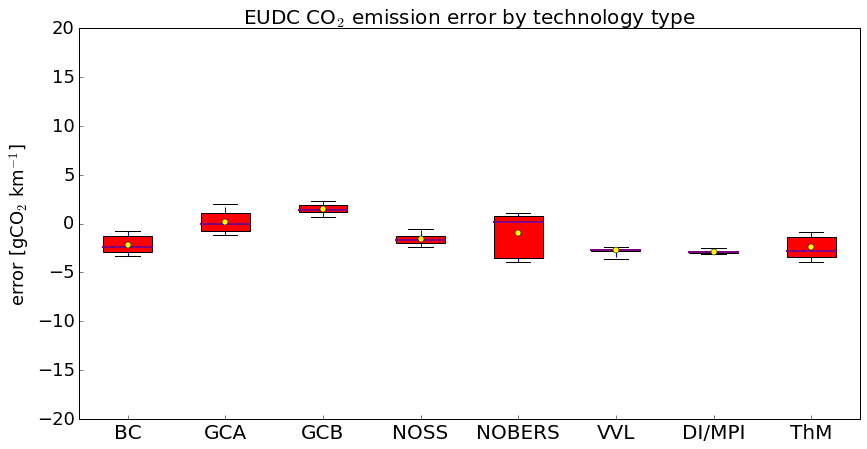

The red box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [19]:
#Plot the EUDC errors per technology type in a boxplot
techboxplot = [techBC.dEUDC,techGCA.dEUDC,techGCB.dEUDC,techNOSS.dEUDC,techBERS.dEUDC,techVVL.dEUDC,techDIMPI.dEUDC,techThM.dEUDC]
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(techboxplot, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = 'red' )
## Custom x-axis labels
ax.set_xticklabels(['BC', 'GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','ThM'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('EUDC CO$_2$ emission error by technology type', fontsize=20)
plt.ylabel("error [gCO$_2$ km$^{-1}$]",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylim(-20, 20)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The red box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

Descriptive statistics for **EUDC** CO$_2$ emission error per technology type

In [20]:
gEUDCmean = grouped.dEUDC.mean()
gEUDCsem = grouped.dEUDC.sem()
gEUDCmedian = grouped.dEUDC.median()
gEUDCstd = grouped.dEUDC.std()
gEUDCvar = grouped.dEUDC.var()
gEUDCskew = grouped.dEUDC.skew()
gEUDCrange = grouped.dEUDC.max()-grouped.dEUDC.min()
gEUDCmin = grouped.dEUDC.min()
gEUDCmax = grouped.dEUDC.max()
gEUDCsum = grouped.dEUDC.sum()
gEUDCcount = grouped.dEUDC.count()
gEUDC_CI95 = 2*grouped.dEUDC.sem()
EUDCerrorsTec = pd.DataFrame(index=['Averages','StdError','Median','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['BC','GCA', 'GCB','NOSS','NOBERS','VVL','DI/MPI','ThM'])
EUDCerrorsTec.loc['Averages'] = pd.Series.round(gEUDCmean,2)
EUDCerrorsTec.loc['StdError'] = pd.Series.round(gEUDCsem,2)
EUDCerrorsTec.loc['Median'] = pd.Series.round(gEUDCmedian,2)
EUDCerrorsTec.loc['StdDev'] = pd.Series.round(gEUDCstd,2)
EUDCerrorsTec.loc['Variance'] = pd.Series.round(gEUDCvar,2)
EUDCerrorsTec.loc['Kurtosis'] = [round(techBC.dEUDC.kurtosis(),2),round(techGCA.dEUDC.kurtosis(),2),round(techGCB.dEUDC.kurtosis(),2),round(techNOSS.dEUDC.kurtosis(),2),round(techBERS.dEUDC.kurtosis(),2),round(techVVL.dEUDC.kurtosis(),2),round(techDIMPI.dEUDC.kurtosis(),2),round(techThM.dEUDC.kurtosis(),2)]
EUDCerrorsTec.loc['Skweness'] = pd.Series.round(gEUDCskew,2)
EUDCerrorsTec.loc['Range'] = pd.Series.round(gEUDCrange,2)
EUDCerrorsTec.loc['Minimum'] = pd.Series.round(gEUDCmin,2)
EUDCerrorsTec.loc['Maximum'] = pd.Series.round(gEUDCmax,2)
EUDCerrorsTec.loc['Sum'] = pd.Series.round(gEUDCsum)
EUDCerrorsTec.loc['Count'] = pd.Series.round(gEUDCcount)
EUDCerrorsTec.loc['Confidence level (95%)'] = pd.Series.round(gEUDC_CI95,2)
EUDCerrorsTec.columns.name='EUDC error'
EUDCerrorsTec

EUDC error,BC,GCA,GCB,NOSS,NOBERS,VVL,DI/MPI,ThM
Averages,-2.16,0.18,1.48,-1.58,-0.98,-2.76,-2.92,-2.41
StdError,0.11,0.14,0.09,0.07,0.27,0.05,0.03,0.14
Median,-2.42,-0.05,1.42,-1.7,0.16,-2.67,-2.92,-2.8
StdDev,0.81,1.04,0.46,0.52,1.95,0.28,0.13,1.05
Variance,0.66,1.08,0.22,0.27,3.79,0.08,0.02,1.1
Kurtosis,-1.64,-1.65,-0.74,-0.86,-1.46,2.6,2.5,-1.83
Skweness,0.26,0.19,0.04,0.49,-0.52,-1.52,0.86,0.1
Range,2.52,3.15,1.62,1.81,5.05,1.21,0.65,2.99
Minimum,-3.3,-1.16,0.7,-2.36,-3.95,-3.62,-3.15,-3.9
Maximum,-0.79,1.99,2.31,-0.56,1.1,-2.4,-2.5,-0.9


### Error statistics for engine parameters (NEDC prediction)

In [21]:
#Gather and name the engine parameters used in the report according to their name in the CO2MPAS output file
param_a = df['nedc']['prediction']['co2_params a']
param_a2 = df['nedc']['prediction']['co2_params a2']
param_b = df['nedc']['prediction']['co2_params b']
param_c = df['nedc']['prediction']['co2_params c']
param_l = df['nedc']['prediction']['co2_params l']
param_l2 = df['nedc']['prediction']['co2_params l2']
param_t0 = df['nedc']['prediction']['co2_params t0']
param_t1 = df['nedc']['prediction']['co2_params t1']
param_trg = df['nedc']['prediction']['co2_params trg']
#Create a dataframe with this data
paramsDF = pd.DataFrame({'param a': param_a,'param a2':param_a2, 'param b':param_b,'param c': param_c,'param l':param_l, 'param l2':param_l2,'param t0': param_t0,'param t1': param_t1,'param trg':param_trg,'NEDC':NEDC,'NEDC error':dNEDC})                 
paramsDF = paramsDF.dropna()
#print the basic automatic statistics
#paramsDF.describe()
paramsDFstat = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['param a','param a2', 'param b','param c', 'param l', 'param l2', 'param t0','param t1', 'param trg'])
paramsDFstat.loc['Averages'] = pd.Series({'param a':round(paramsDF['param a'].mean(),3), 'param a2':round(paramsDF['param a2'].mean(),3), 'param b':round(paramsDF['param b'].mean(),3),'param c':round(paramsDF['param c'].mean(),3),'param l':round(paramsDF['param l'].mean(),3),'param l2':round(paramsDF['param l2'].mean(),3),'param t0':round(paramsDF['param t0'].mean(),3),'param t1':round(paramsDF['param t1'].mean(),3),'param trg':round(paramsDF['param trg'].mean(),3)})
paramsDFstat.loc['StdError'] = pd.Series({'param a':round(paramsDF['param a'].sem(),3), 'param a2':round(paramsDF['param a2'].sem(),3), 'param b':round(paramsDF['param b'].sem(),3),'param c':round(paramsDF['param c'].sem(),3),'param l':round(paramsDF['param l'].sem(),3),'param l2':round(paramsDF['param l2'].sem(),3),'param t0':round(paramsDF['param t0'].sem(),3),'param t1':round(paramsDF['param t1'].sem(),3),'param trg':round(paramsDF['param trg'].sem(),3)})
paramsDFstat.loc['Median'] = pd.Series({'param a':round(paramsDF['param a'].median(),3), 'param a2':round(paramsDF['param a2'].median(),3), 'param b':round(paramsDF['param b'].median(),3),'param c':round(paramsDF['param c'].median(),3),'param l':round(paramsDF['param l'].median(),3),'param l2':round(paramsDF['param l2'].median(),3),'param t0':round(paramsDF['param t0'].median(),3),'param t1':round(paramsDF['param t1'].median(),3),'param trg':round(paramsDF['param trg'].median(),3)})
paramsDFstat.loc['Mode'] = pd.Series({'param a':round(paramsDF['param a'].mode().iloc[0],3), 'param a2':round(paramsDF['param a2'].mode().iloc[0],3), 'param b':round(paramsDF['param b'].mode().iloc[0],3),'param c':round(paramsDF['param c'].mode().iloc[0],3),'param l':round(paramsDF['param l'].mode().iloc[0],3),'param l2':round(paramsDF['param l2'].mode().iloc[0],3),'param t0':round(paramsDF['param t0'].mode().iloc[0],3),'param t1':round(paramsDF['param t1'].mode().iloc[0],3),'param trg':round(paramsDF['param trg'].mode().iloc[0],3)})
paramsDFstat.loc['StdDev'] = pd.Series({'param a':round(paramsDF['param a'].std(),3), 'param a2':round(paramsDF['param a2'].std(),3), 'param b':round(paramsDF['param b'].std(),3),'param c':round(paramsDF['param c'].std(),3),'param l':round(paramsDF['param l'].std(),3),'param l2':round(paramsDF['param l2'].std(),3),'param t0':round(paramsDF['param t0'].std(),3),'param t1':round(paramsDF['param t1'].std(),3),'param trg':round(paramsDF['param trg'].std(),3)})
paramsDFstat.loc['Variance'] = pd.Series({'param a':round(paramsDF['param a'].var(),3), 'param a2':round(paramsDF['param a2'].var(),3), 'param b':round(paramsDF['param b'].var(),3),'param c':round(paramsDF['param c'].var(),3),'param l':round(paramsDF['param l'].var(),3),'param l2':round(paramsDF['param l2'].var(),3),'param t0':round(paramsDF['param t0'].var(),3),'param t1':round(paramsDF['param t1'].var(),3),'param trg':round(paramsDF['param trg'].var(),3)})
paramsDFstat.loc['Kurtosis'] = pd.Series({'param a':round(paramsDF['param a'].kurtosis(),3), 'param a2':round(paramsDF['param a2'].kurtosis(),3), 'param b':round(paramsDF['param b'].kurtosis(),3),'param c':round(paramsDF['param c'].kurtosis(),3),'param l':round(paramsDF['param l'].kurtosis(),3),'param l2':round(paramsDF['param l2'].kurtosis(),3),'param t0':round(paramsDF['param t0'].kurtosis(),3),'param t1':round(paramsDF['param t1'].kurtosis(),3),'param trg':round(paramsDF['param trg'].kurtosis(),3)})
paramsDFstat.loc['Skweness'] = pd.Series({'param a':round(paramsDF['param a'].skew(),3), 'param a2':round(paramsDF['param a2'].skew(),3), 'param b':round(paramsDF['param b'].skew(),3),'param c':round(paramsDF['param c'].skew(),3),'param l':round(paramsDF['param l'].skew(),3),'param l2':round(paramsDF['param l2'].skew(),3),'param t0':round(paramsDF['param t0'].skew(),3),'param t1':round(paramsDF['param t1'].skew(),3),'param trg':round(paramsDF['param trg'].skew(),3)})
paramsDFstat.loc['Range'] = pd.Series({'param a':round((paramsDF['param a'].max()-paramsDF['param a'].min()),3), 'param a2':round((paramsDF['param a2'].max()-paramsDF['param a2'].min()),3), 'param b':round((paramsDF['param b'].max()-paramsDF['param b'].min()),3),'param c':round((paramsDF['param c'].max()-paramsDF['param c'].min()),3),'param l':round((paramsDF['param l'].max()-paramsDF['param l'].min()),3),'param l2':round((paramsDF['param l2'].max()-paramsDF['param l2'].min()),3),'param t0':round((paramsDF['param t0'].max()-paramsDF['param t0'].min()),3),'param t1':round((paramsDF['param t1'].max()-paramsDF['param t1'].min()),3),'param trg':round((paramsDF['param trg'].max()-paramsDF['param trg'].min()),3)})
paramsDFstat.loc['Minimum'] = pd.Series({'param a':round(paramsDF['param a'].min(),3), 'param a2':round(paramsDF['param a2'].min(),3), 'param b':round(paramsDF['param b'].min(),3),'param c':round(paramsDF['param c'].min(),3),'param l':round(paramsDF['param l'].min(),3),'param l2':round(paramsDF['param l2'].min(),3),'param t0':round(paramsDF['param t0'].min(),3),'param t1':round(paramsDF['param t1'].min(),3),'param trg':round(paramsDF['param trg'].min(),3)})
paramsDFstat.loc['Maximum'] = pd.Series({'param a':round(paramsDF['param a'].max(),3), 'param a2':round(paramsDF['param a2'].max(),3), 'param b':round(paramsDF['param b'].max(),3),'param c':round(paramsDF['param c'].max(),3),'param l':round(paramsDF['param l'].max(),3),'param l2':round(paramsDF['param l2'].max(),3),'param t0':round(paramsDF['param t0'].max(),3),'param t1':round(paramsDF['param t1'].max(),3),'param trg':round(paramsDF['param trg'].max(),3)})
paramsDFstat.loc['Sum'] = pd.Series({'param a':round(paramsDF['param a'].sum(),3), 'param a2':round(paramsDF['param a2'].sum(),3), 'param b':round(paramsDF['param b'].sum(),3),'param c':round(paramsDF['param c'].sum(),3),'param l':round(paramsDF['param l'].sum(),3),'param l2':round(paramsDF['param l2'].sum(),3),'param t0':round(paramsDF['param t0'].sum(),3),'param t1':round(paramsDF['param t1'].sum(),3),'param trg':round(paramsDF['param trg'].sum(),3)})
paramsDFstat.loc['Count'] = pd.Series({'param a':round(paramsDF['param a'].count(),3), 'param a2':round(paramsDF['param a2'].count(),3), 'param b':round(paramsDF['param b'].count(),3),'param c':round(paramsDF['param c'].count(),3),'param l':round(paramsDF['param l'].count(),3),'param l2':round(paramsDF['param l2'].count(),3),'param t0':round(paramsDF['param t0'].count(),3),'param t1':round(paramsDF['param t1'].count(),3),'param trg':round(paramsDF['param trg'].count(),3)})
paramsDFstat.loc['Confidence level (95%)'] = pd.Series({'param a':2*round(paramsDF['param a'].sem(),3), 'param a2':2*round(paramsDF['param a2'].sem(),3), 'param b':2*round(paramsDF['param b'].sem(),3),'param c':2*round(paramsDF['param c'].sem(),3),'param l':2*round(paramsDF['param l'].sem(),3),'param l2':2*round(paramsDF['param l2'].sem(),3),'param t0':2*round(paramsDF['param t0'].sem(),3),'param t1':2*round(paramsDF['param t1'].sem(),3),'param trg':2*round(paramsDF['param trg'].sem(),3)})
paramsDFstat

,param a,param a2,param b,param c,param l,param l2,param t0,param t1,param trg
Averages,0.397,-0.002,0.019,-0.001,-2.123,-0.005,2.526,2.928,90.964
StdError,0.002,0,0,0,0.024,0,0.017,0.011,0.062
Median,0.425,-0.002,0.014,-0.001,-2.474,-0.003,2.679,2.963,90.442
Mode,0.333,-0.002,0.012,-0.002,-2.482,-0.008,2.145,2.638,90.037
StdDev,0.044,0.001,0.008,0.001,0.459,0.003,0.327,0.21,1.159
Variance,0.002,0,0,0,0.211,0,0.107,0.044,1.343
Kurtosis,-1.699,-1.763,-1.556,-1.528,-1.78,-1.476,-1.638,-0.805,0.317
Skweness,-0.44,0.47,0.498,-0.467,0.476,-0.478,-0.195,-0.348,1.107
Range,0.122,0.002,0.027,0.002,0.996,0.01,1.076,0.839,5.658
Minimum,0.33,-0.002,0.005,-0.002,-2.508,-0.01,1.925,2.489,88.843


Error statistics for engine parameters applying a filtering of NEDC absolute error < 25 gCO$_2$ km$^{-1}$

In [22]:
#filter for absolute errors above 25g CO2 per km
fparamsDF = paramsDF[abs(paramsDF['NEDC error']) < 25]
#fparamsDFstat = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['param a','param a2', 'param b', 'param l', 'param l2', 'param t0','param t1', 'param trg'])
fparamsDFstat = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['param a','param a2', 'param b', 'param l', 'param l2', 'param t0', 'param trg'])
fparamsDFstat.loc['Averages'] = pd.Series({'param a':round(fparamsDF['param a'].mean(),3), 'param a2':round(fparamsDF['param a2'].mean(),3), 'param b':round(fparamsDF['param b'].mean(),3),'param l':round(fparamsDF['param l'].mean(),3),'param l2':round(fparamsDF['param l2'].mean(),3),'param t0':round(fparamsDF['param t0'].mean(),3),'param trg':round(fparamsDF['param trg'].mean(),3)})
fparamsDFstat.loc['StdError'] = pd.Series({'param a':round(fparamsDF['param a'].sem(),3), 'param a2':round(fparamsDF['param a2'].sem(),3), 'param b':round(fparamsDF['param b'].sem(),3),'param l':round(fparamsDF['param l'].sem(),3),'param l2':round(fparamsDF['param l2'].sem(),3),'param t0':round(fparamsDF['param t0'].sem(),3),'param trg':round(fparamsDF['param trg'].sem(),3)})
fparamsDFstat.loc['Median'] = pd.Series({'param a':round(fparamsDF['param a'].median(),3), 'param a2':round(fparamsDF['param a2'].median(),3), 'param b':round(fparamsDF['param b'].median(),3),'param l':round(fparamsDF['param l'].median(),3),'param l2':round(fparamsDF['param l2'].median(),3),'param t0':round(fparamsDF['param t0'].median(),3),'param trg':round(fparamsDF['param trg'].median(),3)})
fparamsDFstat.loc['Mode'] = pd.Series({'param a':round(fparamsDF['param a'].mode().iloc[0],3), 'param a2':round(fparamsDF['param a2'].mode().iloc[0],3), 'param b':round(fparamsDF['param b'].mode().iloc[0],3),'param l':round(fparamsDF['param l'].mode().iloc[0],3),'param l2':round(fparamsDF['param l2'].mode().iloc[0],3),'param t0':round(fparamsDF['param t0'].mode().iloc[0],3),'param trg':round(fparamsDF['param trg'].mode().iloc[0],3)})
fparamsDFstat.loc['StdDev'] = pd.Series({'param a':round(fparamsDF['param a'].std(),3), 'param a2':round(fparamsDF['param a2'].std(),3), 'param b':round(fparamsDF['param b'].std(),3),'param l':round(fparamsDF['param l'].std(),3),'param l2':round(fparamsDF['param l2'].std(),3),'param t':round(fparamsDF['param t0'].std(),3),'param trg':round(fparamsDF['param trg'].std(),3)})
fparamsDFstat.loc['Variance'] = pd.Series({'param a':round(fparamsDF['param a'].var(),3), 'param a2':round(fparamsDF['param a2'].var(),3), 'param b':round(fparamsDF['param b'].var(),3),'param l':round(fparamsDF['param l'].var(),3),'param l2':round(fparamsDF['param l2'].var(),3),'param t0':round(fparamsDF['param t0'].var(),3),'param trg':round(fparamsDF['param trg'].var(),3)})
fparamsDFstat.loc['Kurtosis'] = pd.Series({'param a':round(fparamsDF['param a'].kurtosis(),3), 'param a2':round(fparamsDF['param a2'].kurtosis(),3), 'param b':round(fparamsDF['param b'].kurtosis(),3),'param l':round(fparamsDF['param l'].kurtosis(),3),'param l2':round(fparamsDF['param l2'].kurtosis(),3),'param t0':round(fparamsDF['param t0'].kurtosis(),3),'param trg':round(fparamsDF['param trg'].kurtosis(),3)})
fparamsDFstat.loc['Skweness'] = pd.Series({'param a':round(fparamsDF['param a'].skew(),3), 'param a2':round(fparamsDF['param a2'].skew(),3), 'param b':round(fparamsDF['param b'].skew(),3),'param l':round(fparamsDF['param l'].skew(),3),'param l2':round(fparamsDF['param l2'].skew(),3),'param t0':round(fparamsDF['param t0'].skew(),3),'param trg':round(fparamsDF['param trg'].skew(),3)})
fparamsDFstat.loc['Range'] = pd.Series({'param a':round((fparamsDF['param a'].max()-paramsDF['param a'].min()),3), 'param a2':round((fparamsDF['param a2'].max()-paramsDF['param a2'].min()),3), 'param b':round((fparamsDF['param b'].max()-paramsDF['param b'].min()),3),'param l':round((fparamsDF['param l'].max()-paramsDF['param l'].min()),3),'param l2':round((fparamsDF['param l2'].max()-paramsDF['param l2'].min()),3),'param t0':round((fparamsDF['param t0'].max()-paramsDF['param t0'].min()),3),'param trg':round((fparamsDF['param trg'].max()-paramsDF['param trg'].min()),3)})
fparamsDFstat.loc['Minimum'] = pd.Series({'param a':round(fparamsDF['param a'].min(),3), 'param a2':round(fparamsDF['param a2'].min(),3), 'param b':round(fparamsDF['param b'].min(),3),'param l':round(fparamsDF['param l'].min(),3),'param l2':round(fparamsDF['param l2'].min(),3),'param t0':round(fparamsDF['param t0'].min(),3),'param trg':round(fparamsDF['param trg'].min(),3)})
fparamsDFstat.loc['Maximum'] = pd.Series({'param a':round(fparamsDF['param a'].max(),3), 'param a2':round(fparamsDF['param a2'].max(),3), 'param b':round(fparamsDF['param b'].max(),3),'param l':round(fparamsDF['param l'].max(),3),'param l2':round(fparamsDF['param l2'].max(),3),'param t0':round(fparamsDF['param t0'].max(),3),'param trg':round(fparamsDF['param trg'].max(),3)})
fparamsDFstat.loc['Sum'] = pd.Series({'param a':round(fparamsDF['param a'].sum(),3), 'param a2':round(fparamsDF['param a2'].sum(),3), 'param b':round(fparamsDF['param b'].sum(),3),'param l':round(fparamsDF['param l'].sum(),3),'param l2':round(fparamsDF['param l2'].sum(),3),'param t0':round(fparamsDF['param t0'].sum(),3),'param trg':round(fparamsDF['param trg'].sum(),3)})
fparamsDFstat.loc['Count'] = pd.Series({'param a':round(fparamsDF['param a'].count(),3), 'param a2':round(fparamsDF['param a2'].count(),3), 'param b':round(fparamsDF['param b'].count(),3),'param l':round(fparamsDF['param l'].count(),3),'param l2':round(fparamsDF['param l2'].count(),3),'param t0':round(fparamsDF['param t0'].count(),3),'param trg':round(fparamsDF['param trg'].count(),3)})
fparamsDFstat.loc['Confidence level (95%)'] = pd.Series({'param a':2*round(fparamsDF['param a'].sem(),3), 'param a2':2*round(fparamsDF['param a2'].sem(),3), 'param b':2*round(fparamsDF['param b'].sem(),3),'param l':2*round(fparamsDF['param l'].sem(),3),'param l2':2*round(fparamsDF['param l2'].sem(),3),'param t0':2*round(fparamsDF['param t0'].sem(),3),'param trg':2*round(fparamsDF['param trg'].sem(),3)})
if (len(paramsDF['NEDC error'])-len(fparamsDF['NEDC error'])) == 0:
    print('No filtering needed, same statistics as above')
else:
    print('Filtered statistics')
    display(fparamsDFstat)

No filtering needed, same statistics as above


Distribution of the engine parameters values for filtered cases

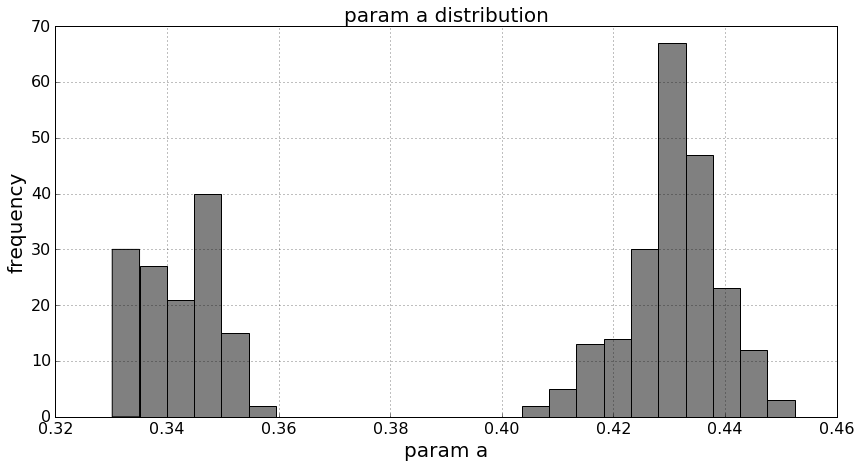

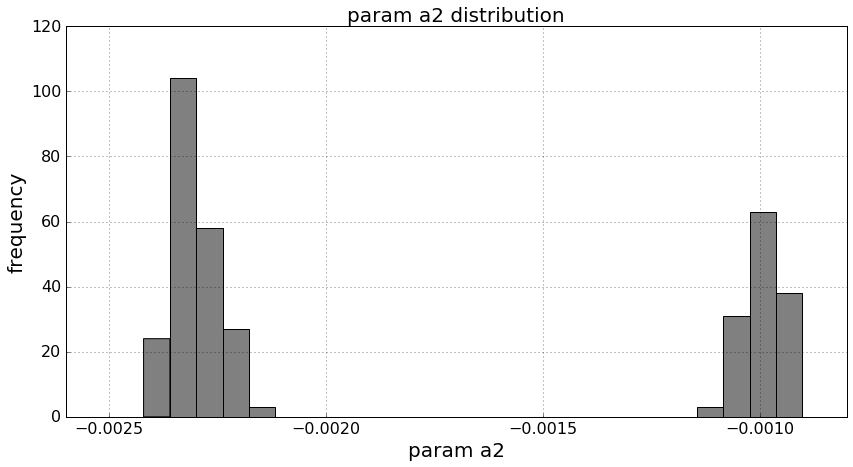

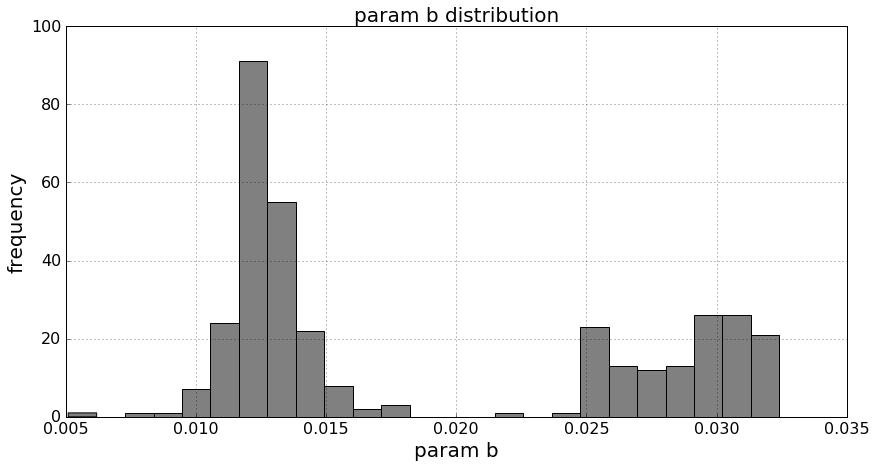

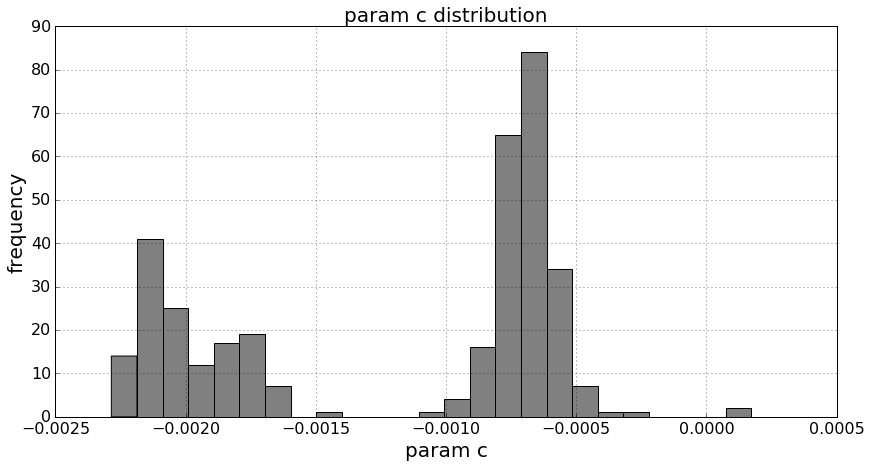

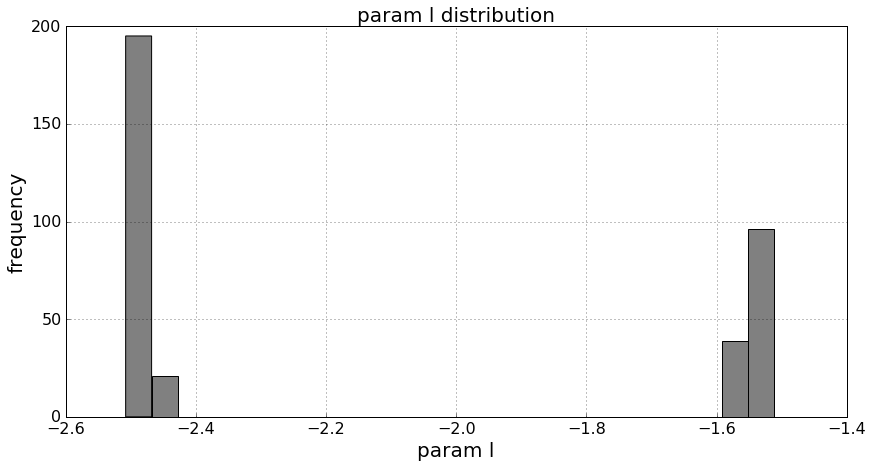

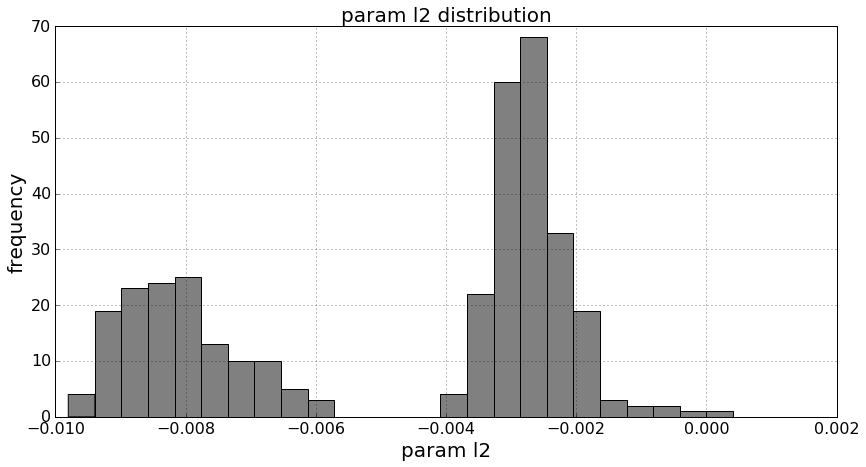

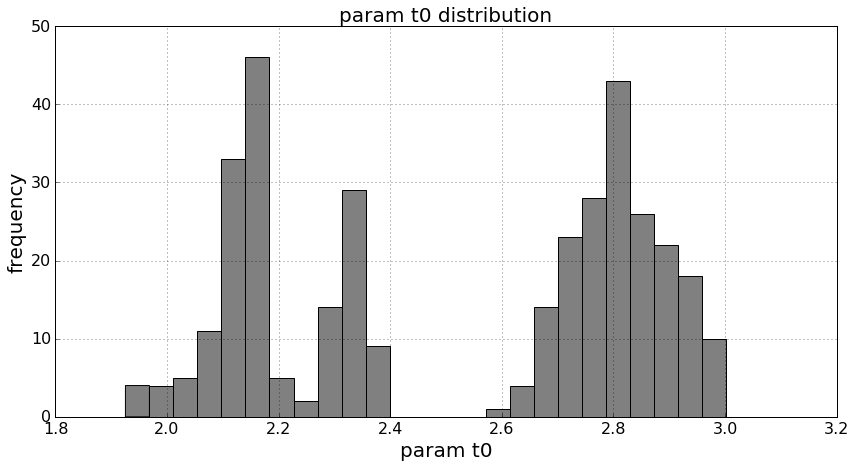

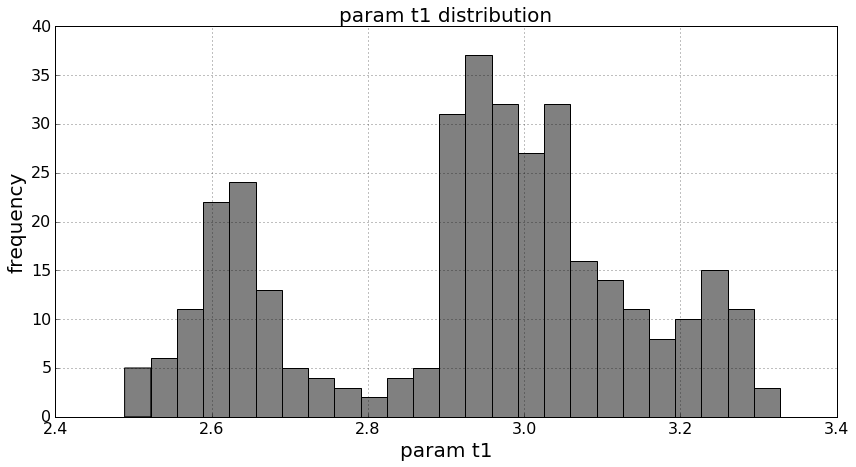

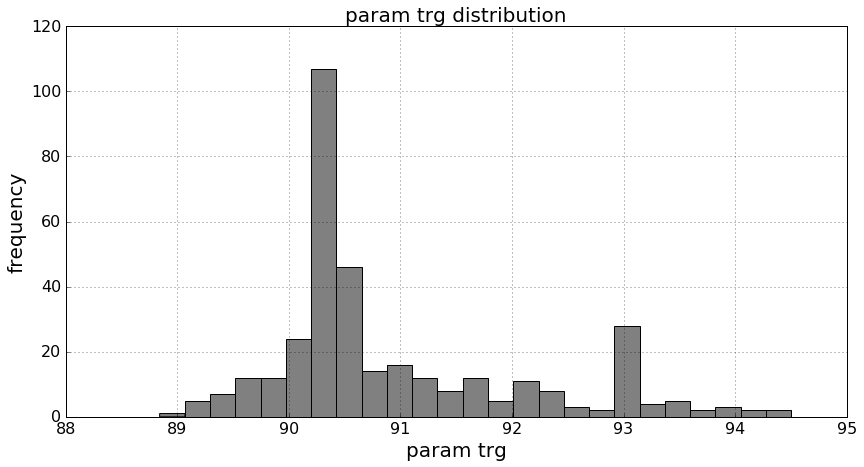

In [23]:
#Histogram for each engine parameter
#create a list with all the available engine parameters
paramlist = list(sorted(fparamsDF.columns.unique()))
for p in range(2,(len(paramlist))):
    tit = paramlist[p] + ' distribution'
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(tit,fontsize=20)
    plot = fig.add_subplot(111)
    # We change the fontsize of minor ticks label 
    plot.tick_params(axis='x', which='major', labelsize=16)
    plot.tick_params(axis='y', which='major', labelsize=16)
    par_hist = fparamsDF[paramlist[p]].hist(bins=25, color='grey')
    par_hist.set_xlabel(paramlist[p],fontsize=20)
    par_hist.set_ylabel("frequency",fontsize=20)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    plt.show()

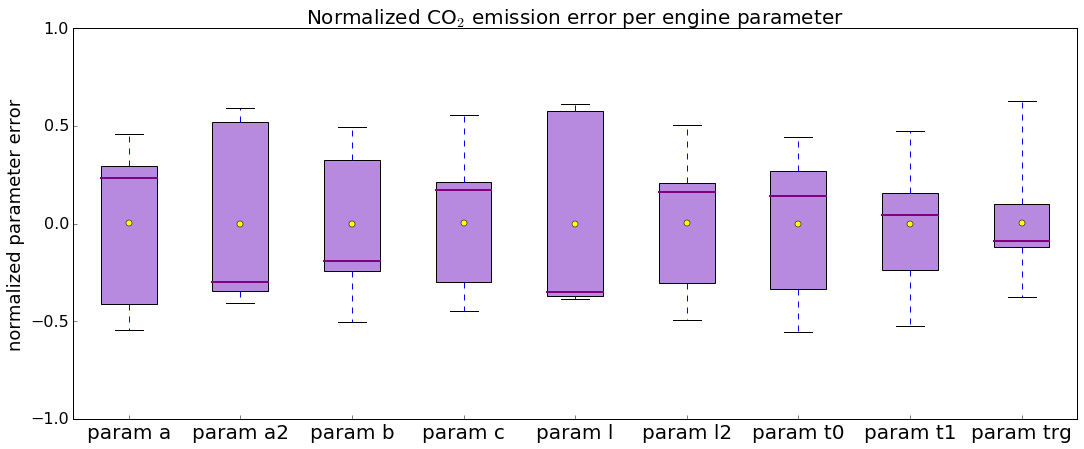

The purple box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [24]:
#Alternatively show normalized error boxplot for all engine parameters
paramsbp = fparamsDF.drop(fparamsDF.columns[[0,1]], axis = 1)
paramsbp_norm = (paramsbp - paramsbp.mean()) / (paramsbp.max() - paramsbp.min())
# Create a figure instance
fig = plt.figure(1, figsize=(18, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(paramsbp_norm.values, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = '#b78adf' )
## Custom x-axis labels
ax.set_xticklabels(['param a', 'param a2', 'param b', 'param c', 'param l', 'param l2', 'param t0','param t1', 'param trg'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('Normalized CO$_2$ emission error per engine parameter', fontsize=20)
plt.ylabel("normalized parameter error",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.set_ylim(-1, 1)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The purple box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

Correlation between all engine parameters and NEDC error. All vehicles

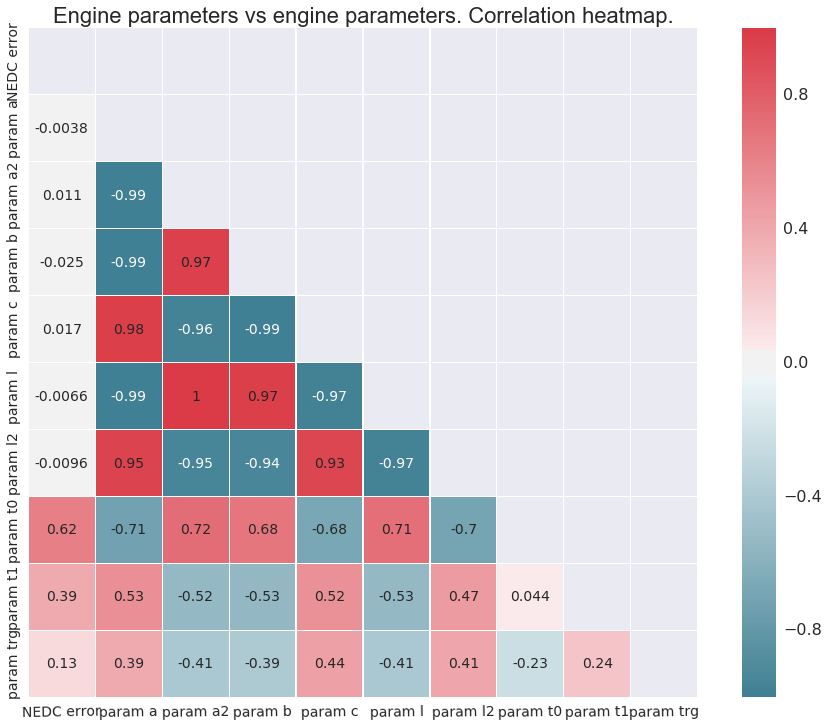

In [25]:
#Create a heatmap with the correlation of all the engine parameters and the NEDC error
fparamNEDCerror = fparamsDF.drop('NEDC', 1)
#from seaborn.apionly import heatmap, diverging_palette
import seaborn as sns
sns.set()
# Compute the correlation matrix
corr = fparamNEDCerror.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center = 0, linewidths=.1,  annot = True, annot_kws={"size":14}, square = True)
plt.title('Engine parameters vs engine parameters. Correlation heatmap.',fontsize=22)
plt.yticks(fontsize = 14) 
plt.xticks(fontsize = 14, rotation = 1)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
plt.show()

In [26]:
#Avoid using seaborn templates and go back to matplotlib templates
mpl.rcParams.update(inline_rc)

## Section 2. Performance of the model. Statistics per vehicle model and case test.

Glossary of vehicle models and number of test cases considered in the report

In [27]:
mod_cases_stats = mod_cases.groupby(['Model code'],as_index=False).count() 
#mod_cases_stats['Brand and model'] = ['Peugeot 308','Audi A4','Opel Astra','Fiat 500','Ford Focus','Volkswagen Polo','BMW X1','Opel Zafira','BMW 116i','Alfa Romeo Giulietta','Fiat Punto']
mod_cases_stats['Brand and model'] = ['BMW 328i','Opel Mokka']
cols = mod_cases_stats.columns.tolist()
cols = cols[-1:] + cols[:2]
mod_cases_stats = mod_cases_stats[cols]
mod_cases_stats

,Brand and model,Model code,Case
0,BMW 328i,Vehicle1,216
1,Opel Mokka,Vehicle2,135


**NEDC**, **UDC**, and **EUDC** CO$_2$ emission error per vehicle model (filtered for NEDC CO$_2$ emission absolute error < 25 gCO$_2$ km$^{-1}$)

Vehicle1,NEDC [gCO$_2$ km$^{-1}$],UDC [gCO$_2$ km$^{-1}$],EUDC [gCO$_2$ km$^{-1}$]
Averages,-2.07,-2.58,-1.76
Median,-3.45,-5.29,-2.73
StdDev,3.59,6.68,1.89


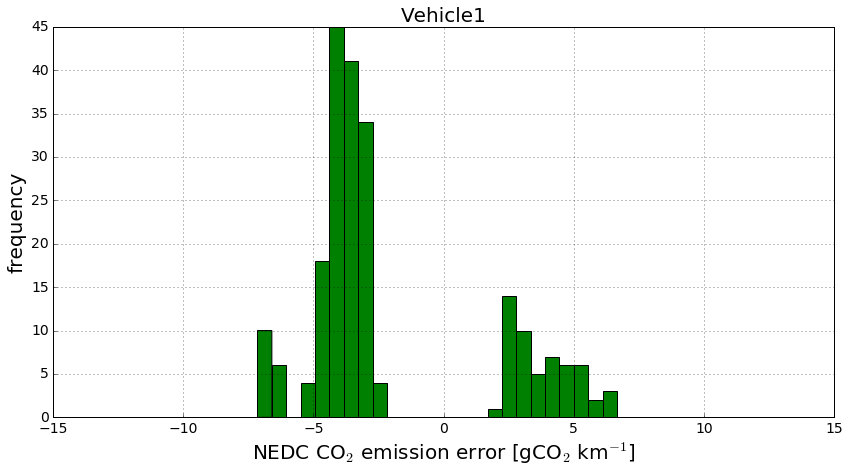

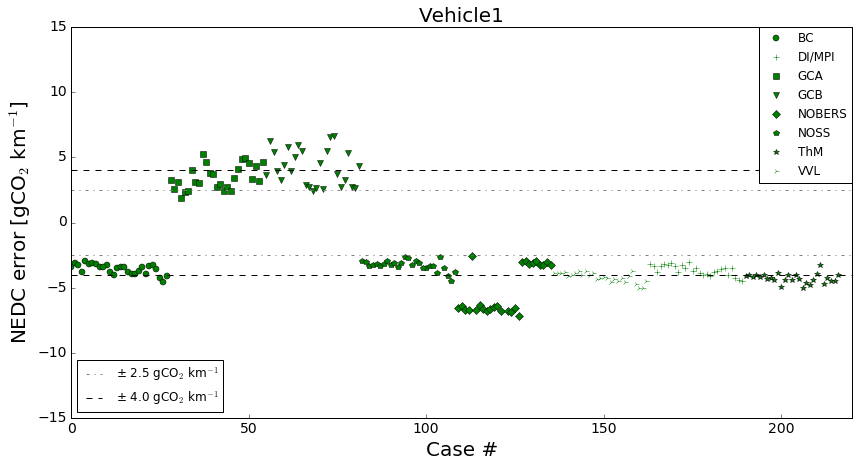

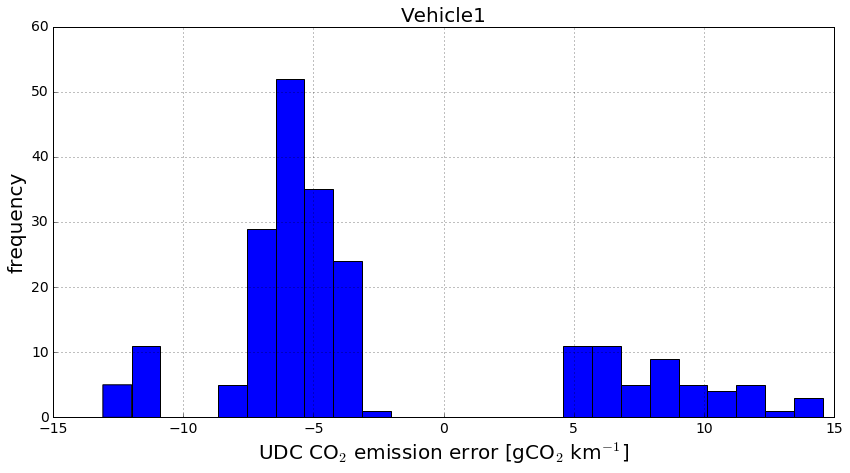

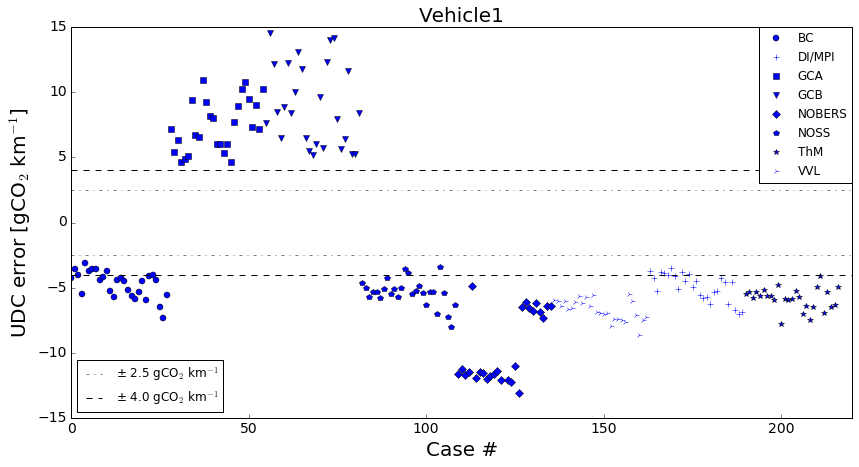

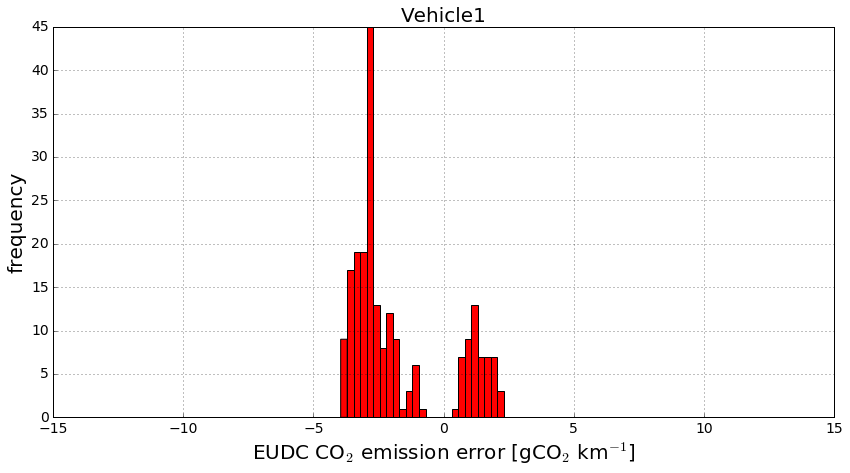

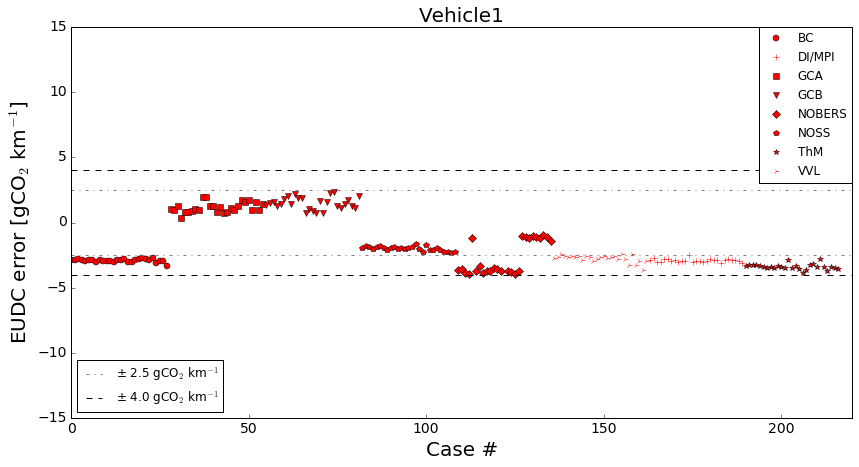

Vehicle2,NEDC [gCO$_2$ km$^{-1}$],UDC [gCO$_2$ km$^{-1}$],EUDC [gCO$_2$ km$^{-1}$]
Averages,-2.13,-4.41,-0.81
Median,-2.43,-4.56,-1.03
StdDev,1,1.47,0.84


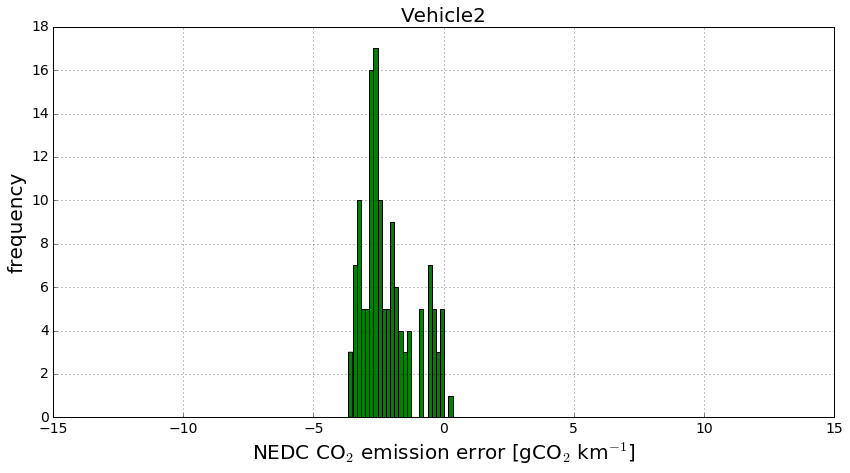

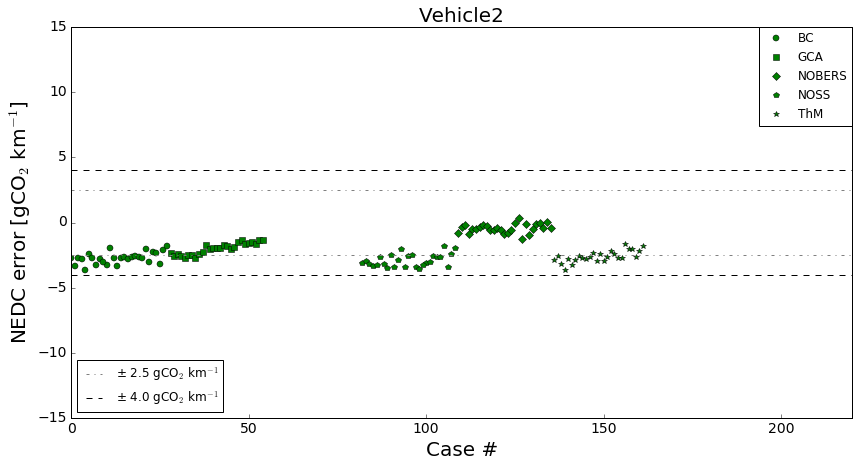

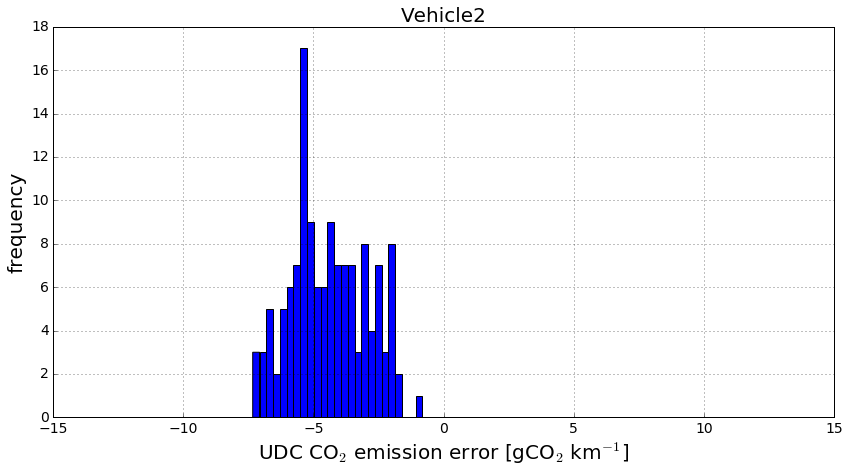

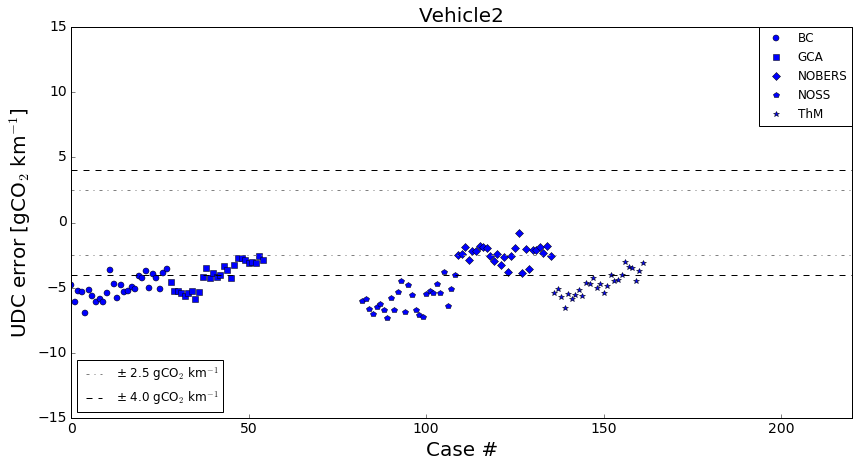

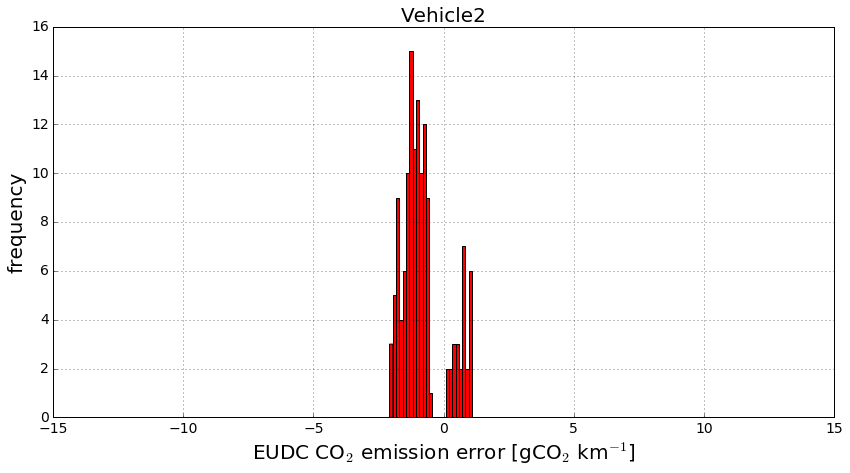

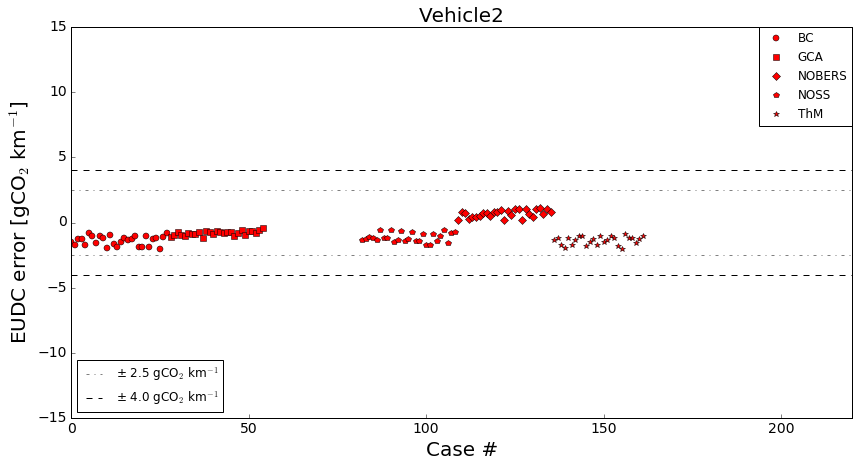

In [28]:
#Create a dataframe with the NECD, UDC, EUDC and vehicle model and case
# CarMod = pd.DataFrame({'dNEDC':dNEDC,'dUDC':dUDC,'dEUDC':dEUDC,'Model code':model,'Case':cases})         
#filter for absolute errors above 25g CO2 per km
CarMod = tech[abs(tech.dNEDC) < 25]
#in order to create statistic tables and plots for each model car, a numeric car ID 'cid' has to be assigned to each vehicle
Carlist = list(sorted(CarMod['Model code'].unique()))
Cidlist = list(range(len(Carlist)))
CarMod.cid = CarMod['Model code'].replace(Carlist, Cidlist, regex = True)
CarMod['cod'] = CarMod.cid
dictecnos = {'BC':'o', 'GCA':'s', 'GCB':'v', 'NOSS':'p','NOBERS':'D','VVL':'4','DI/MPI':'+','ThM':'*'}
#Create a table with the error statistics for each car model
for x in range(0,len(Cidlist)):
    Car = CarMod[CarMod.cod == x]
    grouped = Car.groupby('Tecno')
    CarDF = pd.DataFrame(index=['Averages','Median', 'StdDev'], columns=['NEDC [gCO$_2$ km$^{-1}$]','UDC [gCO$_2$ km$^{-1}$]', 'EUDC [gCO$_2$ km$^{-1}$]'])
    CarDF.loc['Averages'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(Car.dNEDC.mean(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(Car.dUDC.mean(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(Car.dEUDC.mean(),2)})
    CarDF.loc['Median'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(Car.dNEDC.median(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(Car.dUDC.median(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(Car.dEUDC.median(),2)})
    CarDF.loc['StdDev'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(Car.dNEDC.std(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(Car.dUDC.std(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(Car.dEUDC.std(),2)})
    CarDF.columns.name=Car.iat[0,1]
    display(CarDF)
    #plot the NEDC CO2 emission error histogram per vehicle model
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(Car.iat[0,1],fontsize=20)
    plot = fig.add_subplot(111)
    plot.tick_params(axis='x', which='major', labelsize=14)
    plot.tick_params(axis='y', which='major', labelsize=14)
    plot.set_xlim(-15, 15)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    car_NEDC_hist = Car.dNEDC.hist(bins=25, color='green')
    car_NEDC_hist.set_xlabel("NEDC CO$_2$ emission error [gCO$_2$ km$^{-1}$]",fontsize=20)
    car_NEDC_hist.set_ylabel("frequency",fontsize=20)
    plt.show()
    #plot the NEDC error per vehicle and for all cases
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(Car.iat[0,1],fontsize=20)
    plot = fig.add_subplot(111)
    plot.tick_params(axis='x', which='major', labelsize=14)
    plot.tick_params(axis='y', which='major', labelsize=14)
#     plot.set_xlim(0, len(Car.Case))
    plot.set_xlim(0, 220)
    plot.set_ylim(-15,15)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
#     car_scat = plt.scatter(Car.Case, Car.dNEDC, color='green')
    for key, group in grouped:
        plt.plot(group['Case'], group['dNEDC'], color='green', marker=dictecnos[key], label = key, linestyle='')
        first_legend = plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.), loc=1, borderaxespad=0.)
        plot.ax = plt.gca().add_artist(first_legend)
    plot.set_xlabel("Case #",fontsize=20)
    plot.set_ylabel("NEDC error [gCO$_2$ km$^{-1}$]",fontsize=20)
    line1 = plot.axhline(y=-2.5, color='grey', linestyle='-.', label='± 2.5 gCO$_2$ km$^{-1}$')
    line2 = plot.axhline(y=2.5, color='grey', linestyle='-.')
    line3 = plot.axhline(y=-4, color='black', linestyle='--', label='± 4.0 gCO$_2$ km$^{-1}$')
    line4 = plot.axhline(y=4, color='black', linestyle='--')
    plt.legend(handles=[line1, line3], loc = 3)
    plt.show()
    #plot the UDC CO2 emission error histogram per vehicle model
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(Car.iat[0,1],fontsize=20)
    plot = fig.add_subplot(111)
    plot.tick_params(axis='x', which='major', labelsize=14)
    plot.tick_params(axis='y', which='major', labelsize=14)
    plot.set_xlim(-15, 15)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    car_UDC_hist = Car.dUDC.hist(bins=25, color='blue')
    car_UDC_hist.set_xlabel("UDC CO$_2$ emission error [gCO$_2$ km$^{-1}$]",fontsize=20)
    car_UDC_hist.set_ylabel("frequency",fontsize=20)
    plt.show()
    #plot the UDC error per vehicle and for all cases
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(Car.iat[0,1],fontsize=20)
    plot = fig.add_subplot(111)
    plot.tick_params(axis='x', which='major', labelsize=14)
    plot.tick_params(axis='y', which='major', labelsize=14)
#     plot.set_xlim(0, len(Car.Case))
    plot.set_xlim(0, 220)
    plot.set_ylim(-15,15)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
#     car_scat = plt.scatter(Car.Case, Car.dUDC, color='blue')
    for key, group in grouped:
        plt.plot(group['Case'], group['dUDC'], color='blue', marker=dictecnos[key], label = key, linestyle='')
        first_legend = plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.), loc=1, borderaxespad=0.)
        plot.ax = plt.gca().add_artist(first_legend)
    plot.set_xlabel("Case #",fontsize=20)
    plot.set_ylabel("UDC error [gCO$_2$ km$^{-1}$]",fontsize=20)
    line1 = plot.axhline(y=-2.5, color='grey', linestyle='-.', label='± 2.5 gCO$_2$ km$^{-1}$')
    line2 = plot.axhline(y=2.5, color='grey', linestyle='-.')
    line3 = plot.axhline(y=-4, color='black', linestyle='--', label='± 4.0 gCO$_2$ km$^{-1}$')
    line4 = plot.axhline(y=4, color='black', linestyle='--')
    plt.legend(handles=[line1, line3], loc = 3)
    plt.show()
    #plot the EUDC CO2 emission error histogram per vehicle model
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(Car.iat[0,1],fontsize=20)
    plot = fig.add_subplot(111)
    plot.tick_params(axis='x', which='major', labelsize=14)
    plot.tick_params(axis='y', which='major', labelsize=14)
    plot.set_xlim(-15, 15)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    car_EUDC_hist = Car.dEUDC.hist(bins=25, color='red')
    car_EUDC_hist.set_xlabel("EUDC CO$_2$ emission error [gCO$_2$ km$^{-1}$]",fontsize=20)
    car_EUDC_hist.set_ylabel("frequency",fontsize=20)
    plt.show()
    #plot the EUDC error per vehicle and for all cases
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(Car.iat[0,1],fontsize=20)
    plot = fig.add_subplot(111)
    plot.tick_params(axis='x', which='major', labelsize=14)
    plot.tick_params(axis='y', which='major', labelsize=14)
#     plot.set_xlim(0, len(Car.Case))
    plot.set_xlim(0, 220)
    plot.set_ylim(-15,15)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    #car_scat = plt.scatter(Car.Case, Car.dEUDC, color='red')
    for key, group in grouped:
        plt.plot(group['Case'], group['dEUDC'], color='red', marker=dictecnos[key], label = key, linestyle='')
        first_legend = plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.), loc=1, borderaxespad=0.)
        plot.ax = plt.gca().add_artist(first_legend)
    plot.set_xlabel("Case #",fontsize=20)
    plot.set_ylabel("EUDC error [gCO$_2$ km$^{-1}$]",fontsize=20)
    line1 = plot.axhline(y=-2.5, color='grey', linestyle='-.', label='± 2.5 gCO$_2$ km$^{-1}$')
    line2 = plot.axhline(y=2.5, color='grey', linestyle='-.')
    line3 = plot.axhline(y=-4, color='black', linestyle='--', label='± 4.0 gCO$_2$ km$^{-1}$')
    line4 = plot.axhline(y=4, color='black', linestyle='--')
    plt.legend(handles=[line1, line3], loc = 3)
    plt.show()

## NEDC error vs engine parameters per vehicle model

In [29]:
#Create a dataframe with the engine parameters, the model of the vehicle and the NEDC error for filtering
parCarDF = paramsDF
parCarDF['carmodel'] = model
# parCarDF['carid'] = CarMod.cod
parCarDF
fparCarDF = parCarDF[parCarDF['NEDC error'] < 25]
groups = fparCarDF.groupby('carmodel')

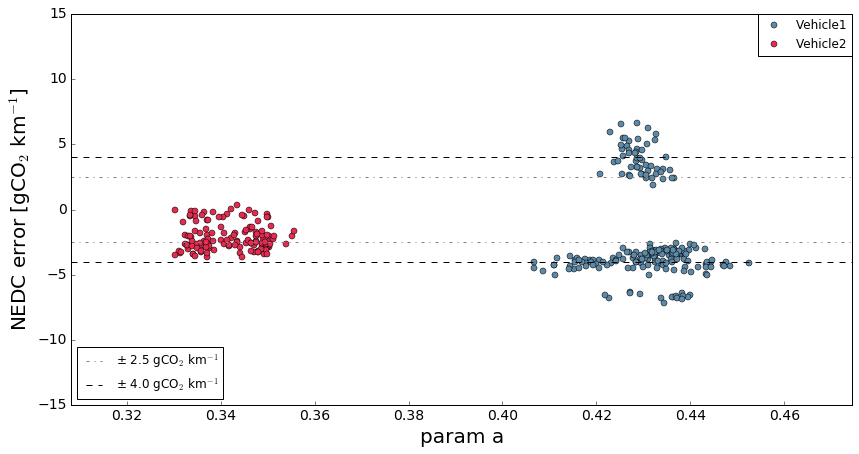

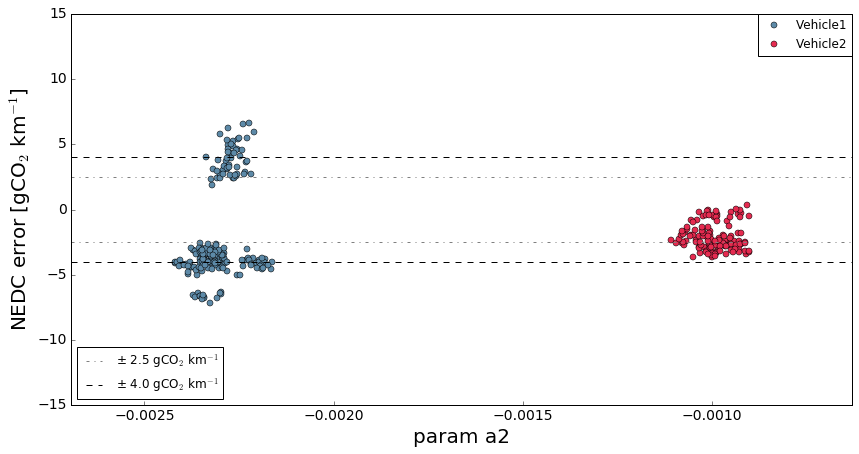

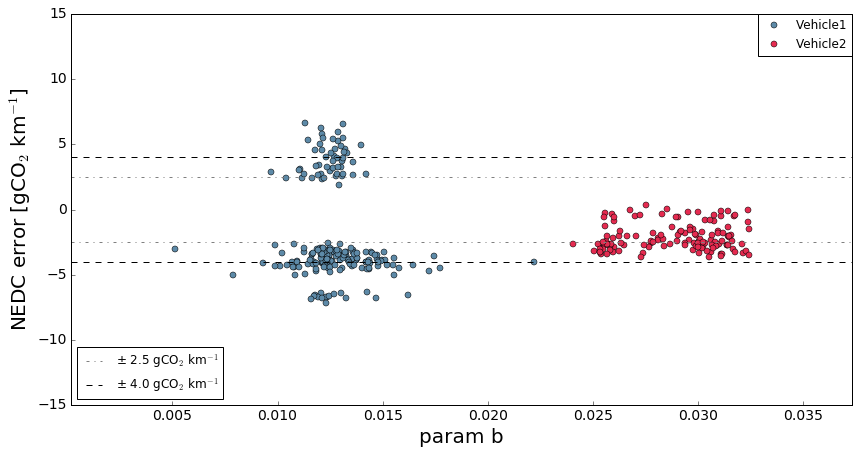

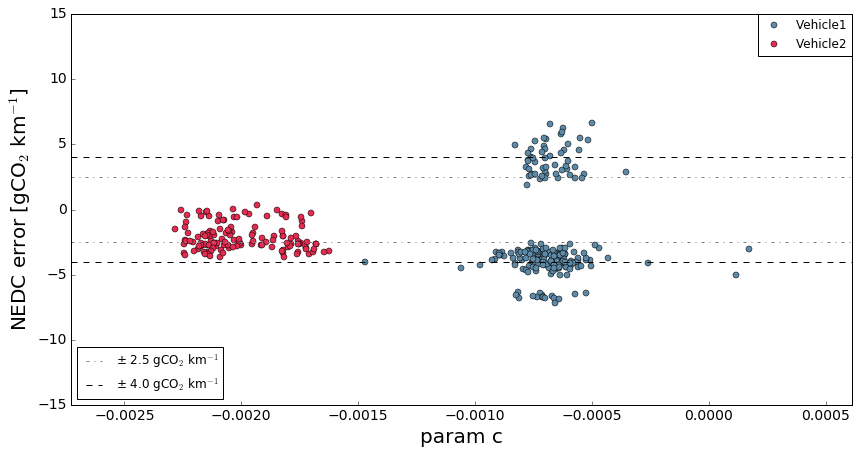

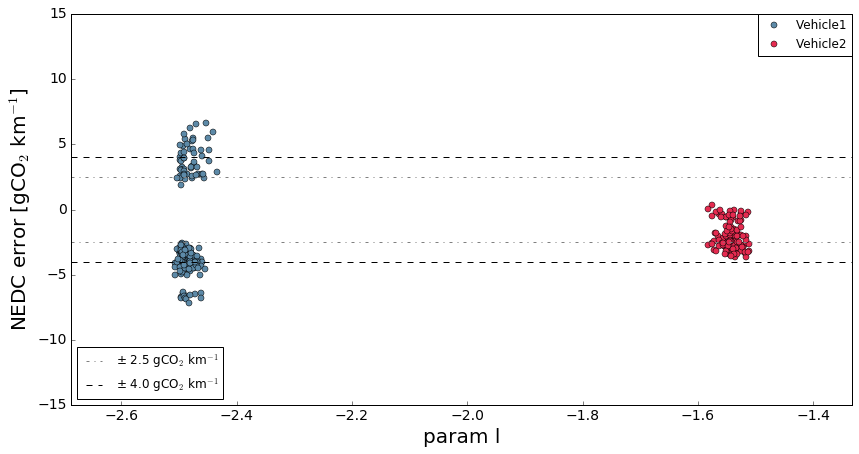

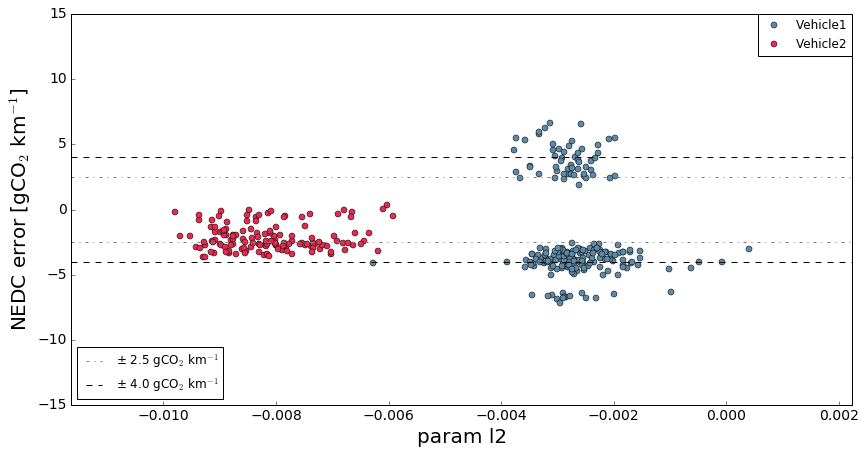

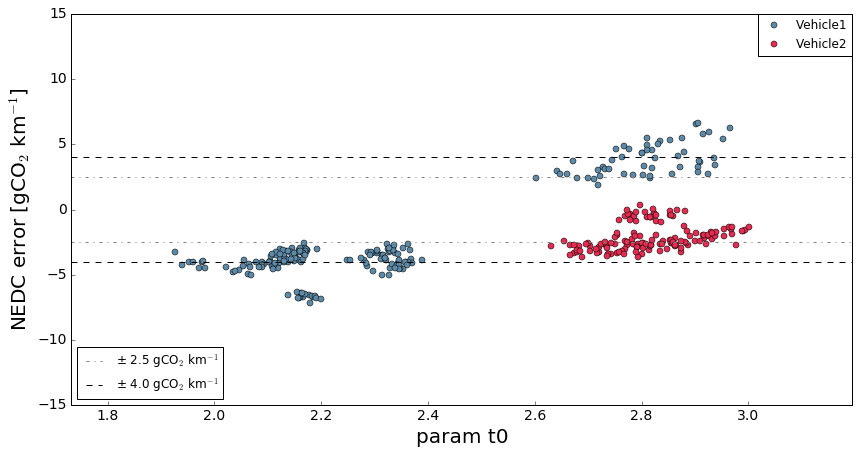

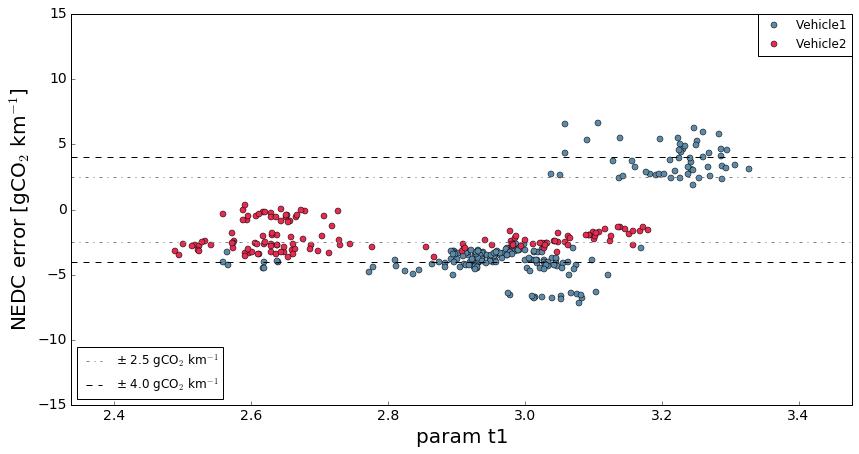

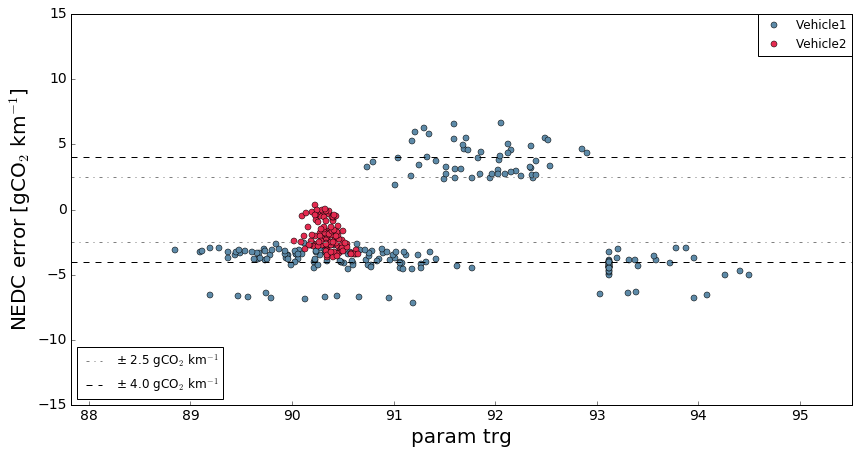

In [30]:
#Plotting the filtered NEDC error vs engine parameters for each vehicle model
for p in range(2,(len(paramlist))):
    fig = plt.figure(1, figsize=(14, 7))
    plot = fig.add_subplot(111)
    plot.margins(0.18)
    plot.set_prop_cycle(cycler('color', ['#5d8aa8','#e52b50','#ffbf00','#9966cc','#a4c639','#cd9575','#fbceb1','#00ffff','#b2beb5']))
    for name, group in groups:
        plt.plot(group[paramlist[p]], group['NEDC error'], marker='o', linestyle='', ms=6, label=name)
        plt.tick_params(axis='x', which='major', labelsize=14)
        plt.tick_params(axis='y', which='major', labelsize=14)
        plot.set_ylim(-15,15)
        plot.get_xaxis().tick_bottom()
        plot.get_yaxis().tick_left()
        first_legend = plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.), loc=1, borderaxespad=0.)
        plot.ax = plt.gca().add_artist(first_legend)
    plot.set_xlabel(paramlist[p],fontsize=20)
    plot.set_ylabel("NEDC error [gCO$_2$ km$^{-1}$]",fontsize=20)
    line1 = plt.axhline(y=-2.5, color='grey', linestyle='-.', label='± 2.5 gCO$_2$ km$^{-1}$')
    line2 = plt.axhline(y=2.5, color='grey', linestyle='-.')
    line3 = plt.axhline(y=-4, color='black', linestyle='--', label='± 4.0 gCO$_2$ km$^{-1}$')
    line4 = plt.axhline(y=4, color='black', linestyle='--')
    plt.legend(handles=[line1, line3], loc=3)
    plt.show()    

Engine parameters vs engine parameters. Scatterplot per vehicle.

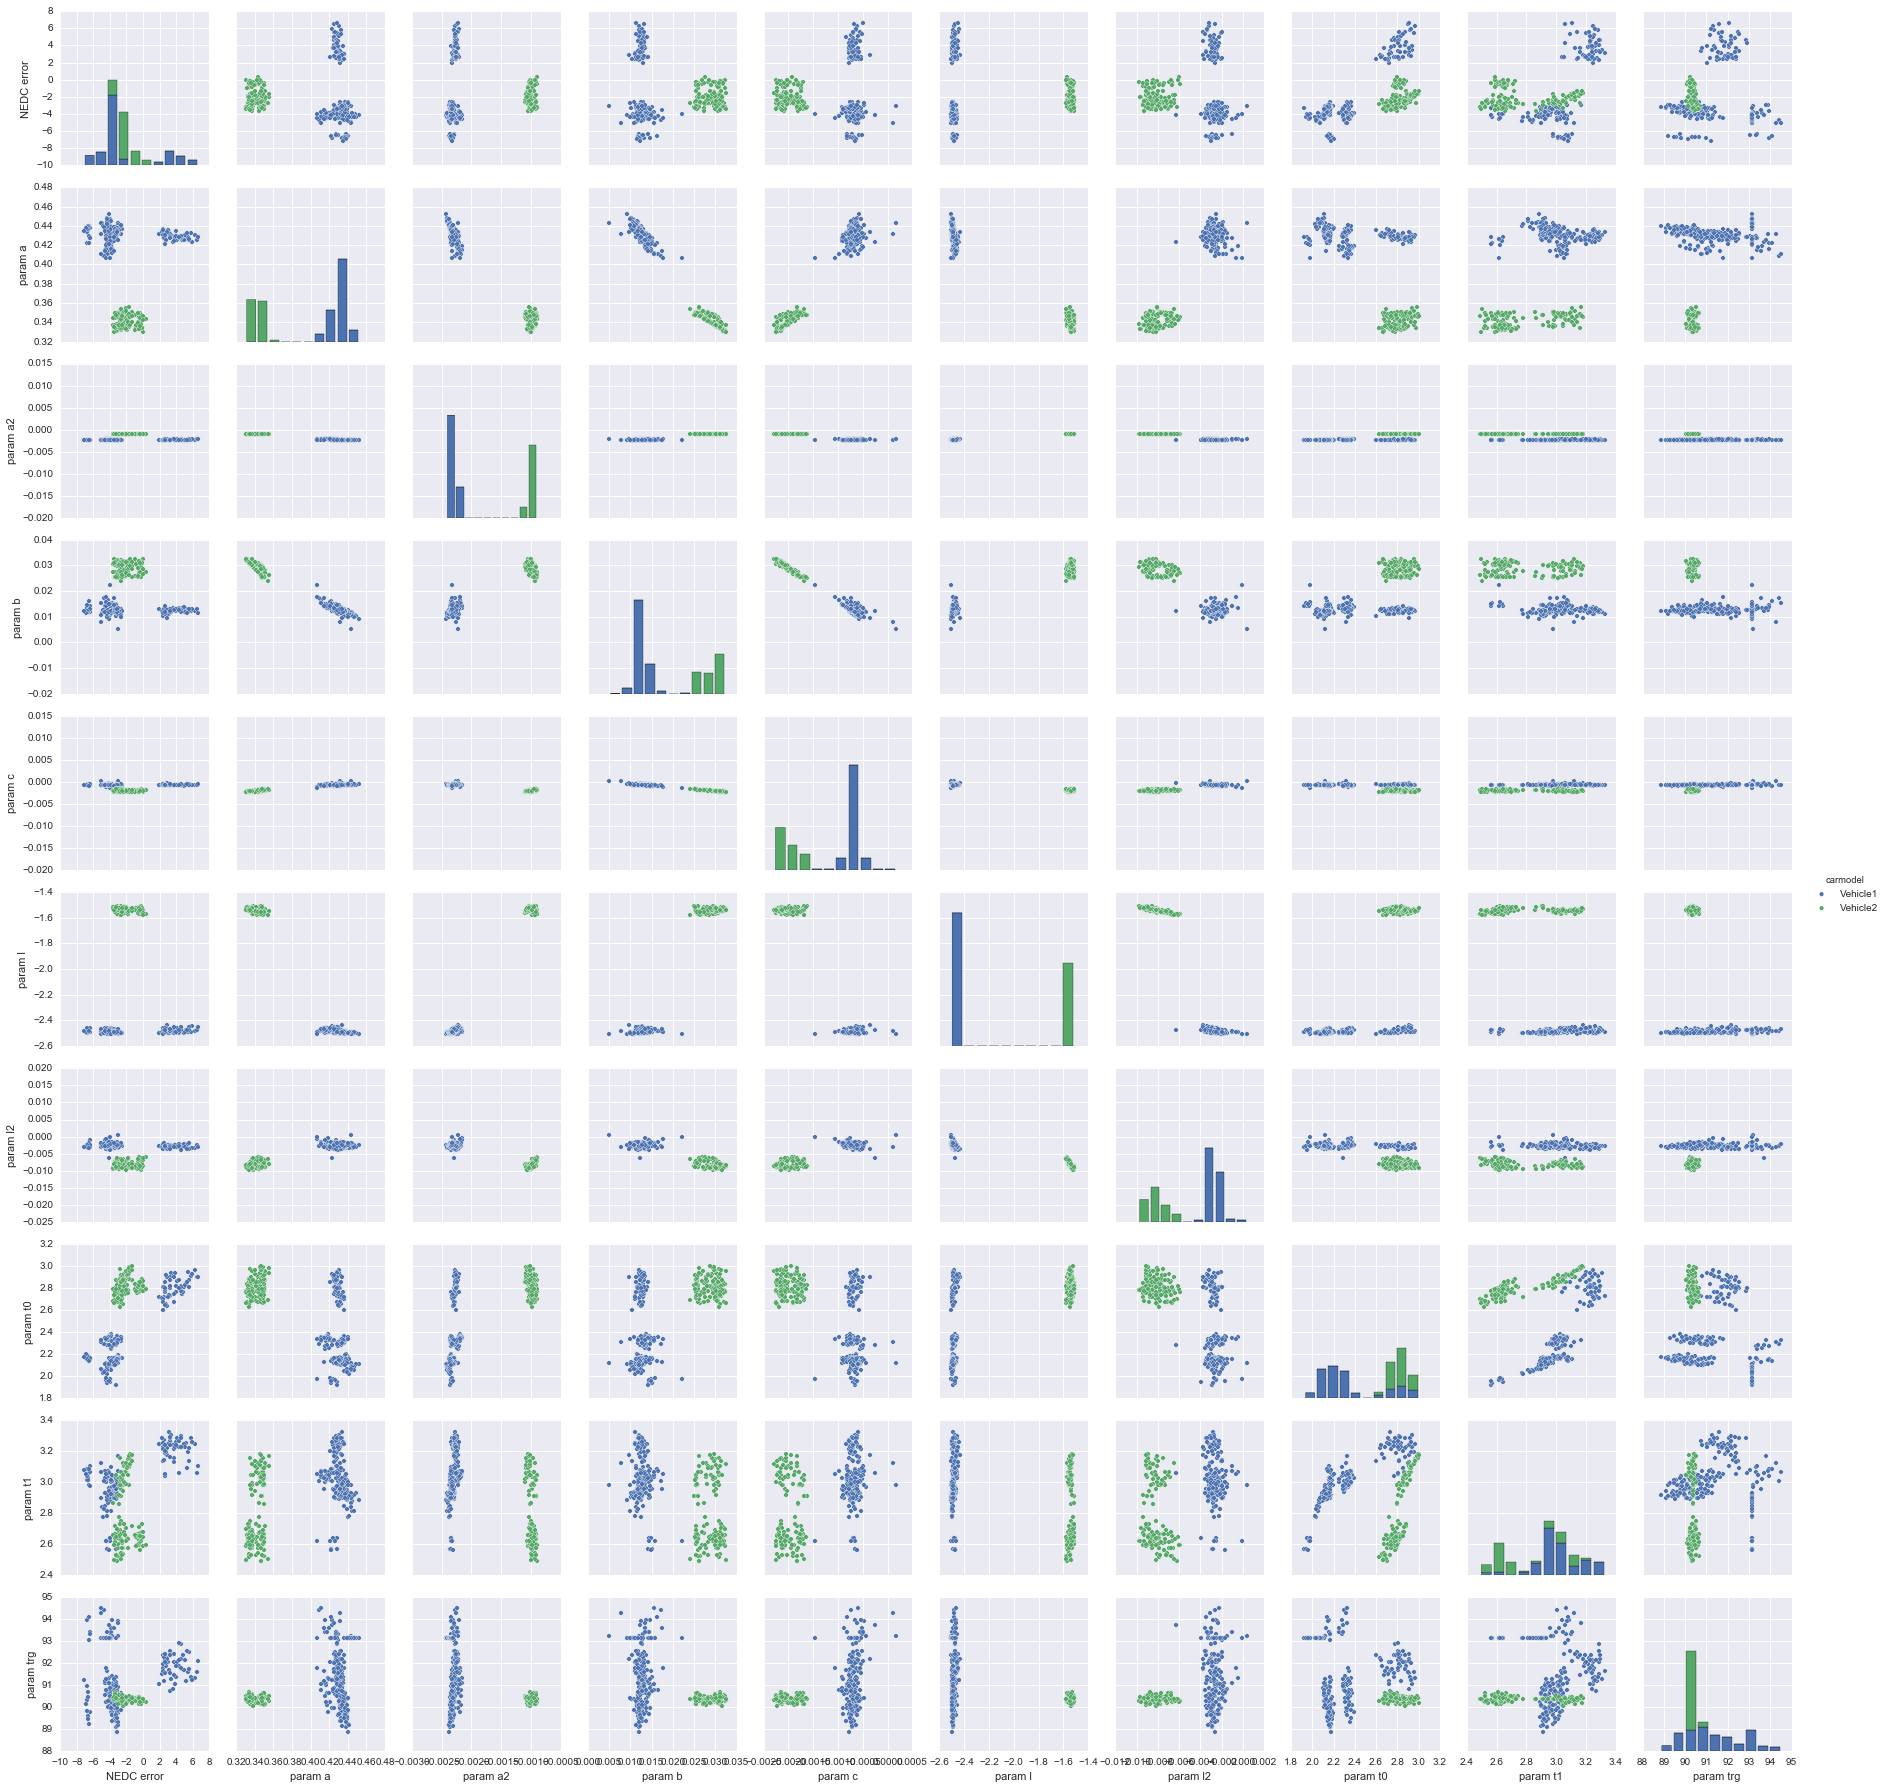

In [31]:
#plot engine parameters ones against the others and inform about vehicles models
import seaborn as sns
sns.set()
scatterDF = fparCarDF.drop('NEDC', 1)
sns.pairplot(scatterDF, hue="carmodel")#, palette = 'jajaj')#, kind = 'reg')
plt.show()